## Proyecto 2 - Ingeniería de features, Modelos avanzados e Interpretación de modelos

# Análisis mercado inmobiliario en base a la empresa Properati

DS-25 / Elizabet Kenny / Octubre 2020


### Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones **crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.**

**A modo de continuación del PROYECTO 1, este Proyecto 2 busca aplicar transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning, pudiendo emplear mejoras en los resultados obtenidos anteriormente.**

De este modo, **primero retomaré el dataset con los lineamientos de Proyecto 2 teniendo en consideración lo aprendido den Proyecto 1 para luego comparar resultados de modelos buscando cumplor el objetivo que plantea el problema inicial.**


De ésta forma el proyecto tendrá tres partes:

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

**PARTE B - Modelos Avanzados**

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.


**PARTE C - Interpretación de modelos**

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

#####  DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

Ahora bien, a trabajar en este proyecto, se ofrece como recurso una muestra del conjunto de publicaciones de propiedades en venta dentro de la inmobiliaria Properati disponible en su página web. 
https://www.properati.com.ar/

### Los atributos 
A continuación vamos a describir los atributos(columnas) que contiene el Dataset con el que trabajaremos en éste proyecto y tendremos como referencia inicial:

(Los mismos correponden en parte al **Esquema de avisos** de la empresa inmobiliaria)

* **start_date** - Fecha de alta del aviso.
* **end_date** - Fecha de baja del aviso.
* **created_on** - Fecha de alta de la primera versión del aviso.
* **lat** - Latitud.
* **lon** - Longitud.
* **l1** - Nivel administrativo 1: país.
* **l2** - Nivel administrativo 2: usualmente provincia.
* **l3** - Nivel administrativo 3: usualmente ciudad.
* **rooms** - Cantidad de ambientes (útil en Argentina).
* **bedrooms** - Cantidad de dormitorios (útil en el resto de los países).
* **bathrooms** - Cantidad de baños.
* **surface_total** - Superficie total en m².
* **surface_covered** - Superficie cubierta en m².
* **price** - precio en la moneda especificada en currency
* **currency**- divisa en la que está expresada la publicación
* **title** - Título del anuncio.
* **description** - Descripción del anuncio.
* **property_type** - tipo de propiedad (casa, departamento, ph, etcétera)
* **operation_type** - Tipo de operación (Venta, Alquiler).





## Parte A - Transformación de Datos

Analisis Exploratorio de Datos

Importaremos las librerias y configuraciones necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Ahora cargarémos el dataset con el que comenzamos el Proyecto 1 Properati, para comenzar a visualizarlo y trabajarlo. 

In [2]:
data_raiz = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
print('Tamaño del dataset original es de {} filas y {} columnas.'.format(*data_raiz.shape))

Tamaño del dataset original es de 146660 filas y 19 columnas.


In [3]:
data_raiz.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
data_raiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Haré un primer filtrado en base a las categorias que conocemos y sabemos son importantes en el analisis del dataset.

Decido antes de continuar eliminar algunas columnas que anticipadamente se que no me serán util para la busqueda del objetivo final: precedir el precio de los inmubles. 

De esta manera, para simplificar las columnas, eliminaré:
* las referidas a las fechas de los anuncios (types object -  Si fueran las fechas de construcción de las viviendas sería útil, pero como no es el caso puedo descartarlas ya que se tratan de fechas utiles para el procedimiento a la hora de la publicidad.) 
* `currency` ya que sé que todos los valores de precio se refieren a USD,
* `l1` ya que sé que todos los anuncios publicados son de Argentina,
* `operation_type`, ya que sé tambien que las operaciones son de VENTA,
* y, `lat` y `log` que, como observé en Proyecto 1, no me será útil en este análisis de obtener el precio de tasación. Así como sucede en las columnas de fechas. 

In [5]:
data = data_raiz.drop(['lon','lat','start_date','end_date','created_on', 'currency', 'l1', 'operation_type' ], axis=1)

In [6]:
data.shape

(146660, 11)

**Tipos de propiedad**
¿Cuántos tipos de propiedad hay publicados según este dataset?

In [7]:
print('Los tipos de propiedades en anuncios son: ', data['property_type'].unique())
print(data['property_type'].value_counts())
print(data.shape)

Los tipos de propiedades en anuncios son:  ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64
(146660, 11)


Aquí podemos notar a simple vista la preponderancia de la categoría `Departamento` por sobre las demás, lo cual no nos deja destacar claramente la pequeña diferencia numerica entre los tipos de inmuebles menos predominantes, como lo vemos en las celdas anteriores.
Para su mejor visualización filtraremos para ampliar graficar los inmuebles minoritarios:

In [8]:
data_2 = data[(data.property_type.isin
                   (['Casa de campo','Oficina','Lote','Otro','Local comercial','Cochera','Depósito']))]

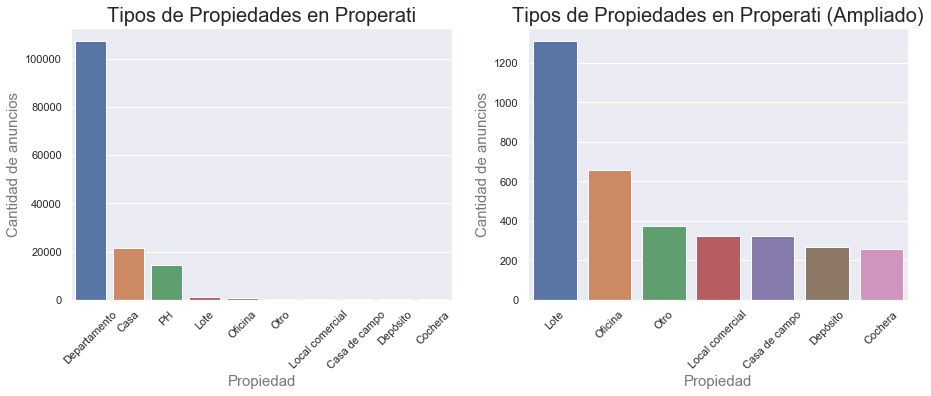

In [9]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(data = data, x = 'property_type', order = data.property_type.value_counts().index )
plt.xticks(rotation= 45)
plt.ylabel('Cantidad de anuncios', size = 15, color ='#777777')
plt.xlabel('Propiedad', size = 15, color ='#777777')
plt.title('Tipos de Propiedades en Properati', size=20)

plt.subplot(1,2,2)
sns.countplot(data = data_2, x = 'property_type', order = data_2.property_type.value_counts().index )
plt.xticks(rotation= 45)
plt.ylabel('Cantidad de anuncios', size = 15, color ='#777777')
plt.xlabel('Propiedad', size = 15, color ='#777777')
plt.title('Tipos de Propiedades en Properati (Ampliado)', size=20)


plt.show()

Pensando en filtrar el dataset con el cual continuar. Realmente ¿qué porcentajes manejamos por tipo de propiedad?

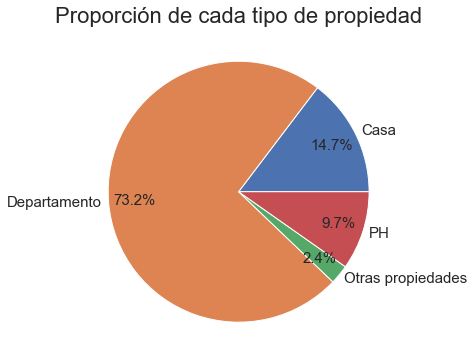

In [10]:
property_types = data["property_type"].value_counts()
property_types = property_types.groupby(np.where(property_types >= 2000, property_types.index, 'Otras propiedades')).sum()

fig1, ax1 = plt.subplots(figsize=(14,6))

ax1.pie(x = property_types,labels = property_types.index,
        autopct = '%1.1f%%',textprops = {'fontsize': 15},
        pctdistance = 0.8,labeldistance = 1.05)

#ax1.axis('equal')
plt.title("Proporción de cada tipo de propiedad", size=22)

plt.show()

Con este grafico de torta puedo visualizar con mayor certeza las proporciones. Sabiendo a Departamento cómo el mas influyente, siguiendole Casa y PH (cómo filtramos en P1) decido descartar así nuevamente "Otras propiedades".

In [11]:
data = data[((data['property_type'] == "Departamento") | 
                 (data['property_type'] == "Casa") |
                 (data['property_type'] == "PH"))]

In [12]:
data.shape

(143145, 11)

¿De qué **regiones** son las publicaciones?


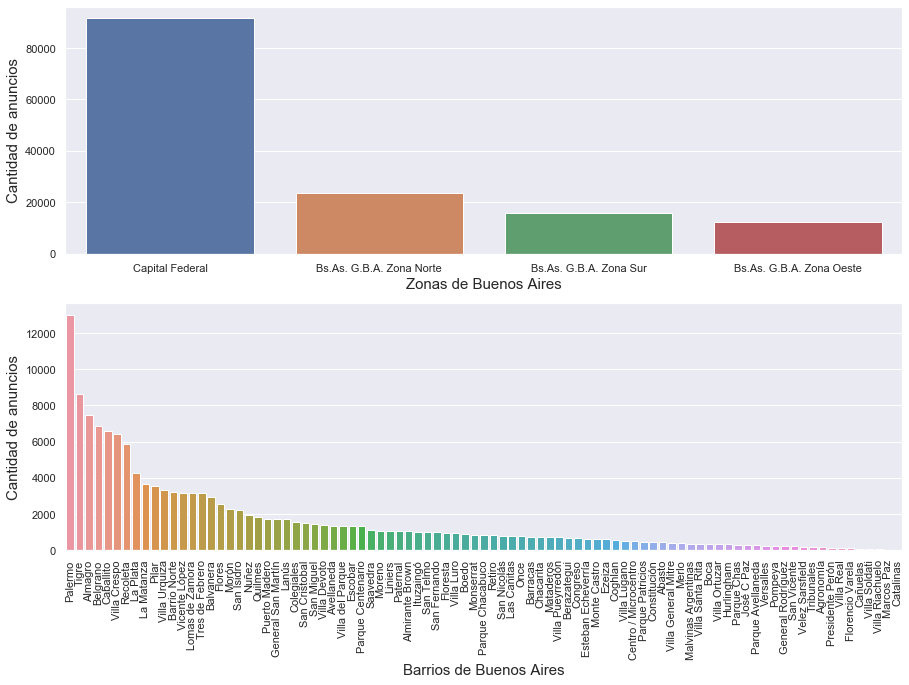

In [13]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data = data, x = 'l2', order = data.l2.value_counts().index)
plt.xlabel('Zonas de Buenos Aires', size = 15)
plt.ylabel('Cantidad de anuncios', size = 15)


plt.subplot(2,1,2)
sns.countplot(data = data, x = 'l3',order = data.l3.value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('Barrios de Buenos Aires', size = 15)
plt.ylabel('Cantidad de anuncios', size = 15)

plt.show()

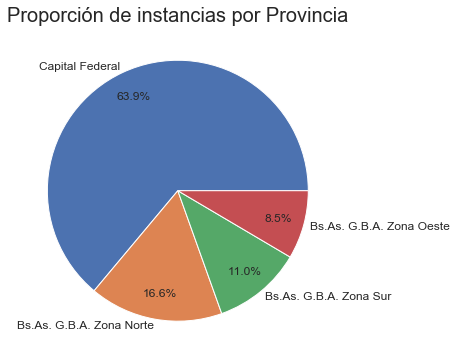

In [14]:
prov = data["l2"].value_counts()

fig1, ax1 = plt.subplots(figsize=(14,6))

ax1.pie(x = prov,labels = prov.index,
        autopct = '%1.1f%%',textprops = {'fontsize': 12},
        pctdistance = 0.8,labeldistance = 1.05)

#ax1.axis('equal')
plt.title("Proporción de instancias por Provincia", size=20)

plt.show()

Con estos graficos podemos observar que la zona de **Capital Federal contine la mayor cantidad de anuncios de propiedades en ésta inmobiliaria. En ella se destaca el Barrio de Palermo por sobre los otros.**

Pero, contrario al Proyecto 1, no creo conveniente eliminar las zonas de G.B.A. ya que son casi un 40% del dataset, y componen más porciones de los tipos de propiedad Casa y PH que decidí conservar en el paso anterior.

In [15]:
data.shape

(143145, 11)

In [16]:
#fig = plt.figure(figsize=(12,12))

#columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
#sns.pairplot(data[columns], hue="property_type")

#plt.show()

In [17]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,143145.000000,143145.000000,138934.000000,124522.000000,124236.000000,1.431450e+05
mean,3.096140,1.999490,1.597715,182.381089,112.374159,2.378184e+05
std,1.393088,1.129123,0.885980,1436.708405,919.025616,2.881004e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.120000e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,138.000000,108.000000,2.644650e+05
max,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


### PA - 1.Tratamiento de Valores Faltantes

Empiezo primero a tratar Valores Faltantes del dataset.

En función de la aleatoriedad de los valores perdidos se suele establecer la siguiente clasificación: 
* Missing At Random (MAR): ocurre cuando la ausencia de los datos podría depender de los valores observados.
* Missing Not At Random (MNAR): si el ser un dato faltante depende del valor de los datos no observados.
* Missing Completely At Random (MCAR): si el evento de que cierto valor sea faltante es independiente de las variables observadas y no observadas, y ocurre de forma completamente aleatoria. Se trata de un caso especial de MAR.

Ahora, ¿tenemos valores faltantes? ¿cuántos? ¿de qué tipo?

In [18]:
print('Cantidad de Valores Faltantes por atributos:') 
print(data.isnull().sum())

Cantidad de Valores Faltantes por atributos:
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           4211
surface_total      18623
surface_covered    18909
price                  0
title                  0
description            0
property_type          0
dtype: int64


In [19]:
data.isnull().sum()/len(data)*100 #Porcentaje que representan en el dataset

l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.941772
surface_total      13.009885
surface_covered    13.209682
price               0.000000
title               0.000000
description         0.000000
property_type       0.000000
dtype: float64

In [20]:
data_missing = data[data.isnull().any(axis=1)]
data_missing 

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
351,Capital Federal,Congreso,1.0,1.0,NaN,23.0,23.0,72000.0,VENTA MONOAMBIENTE CONGRESO EXCELENTE ESTADO,Corredor Responsable: Damian Perrone - CUCICBA...,Departamento
360,Capital Federal,Caballito,1.0,1.0,NaN,14.0,14.0,27000.0,"EXCELENTE COCHERA, EXCELENTE INVERSION !",Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
438,Capital Federal,Villa Ortuzar,4.0,3.0,NaN,88.0,88.0,192000.0,DEPTO.3 AMB Y DEP - AV. A. THOMAS 1395-V.ORTUZAR,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento
473,Bs.As. G.B.A. Zona Sur,Avellaneda,3.0,2.0,NaN,370.0,370.0,149000.0,"Casa de 3 amb Sarandi Lote de 42 x 8,66 mtrs",Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa
573,Capital Federal,Caballito,2.0,1.0,NaN,25.0,23.0,70000.0,DEPARTAMENTO EN VENTA,Xintel (MSD-MSD-50) <p>Departamento 2 AMBIENTE...,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
145625,Capital Federal,Palermo,6.0,5.0,3.0,257.0,NaN,690000.0,"VENTA EXCEPCIONAL DUPLEX DE 257 M2, TERRAZA PR...",VENTA EXCEPCIONAL DUPLEX ALTO DE 257 M2 CON TE...,Departamento
145640,Bs.As. G.B.A. Zona Sur,Lanús,3.0,2.0,1.0,NaN,1.0,95000.0,DEPARTAMENTO EN EXCELENTE UBICACION DE 3 AMBI...,DEPARTAMENTO EN EXCELENTE UBICACION DE 3 AMBIE...,Departamento
145950,Bs.As. G.B.A. Zona Norte,San Fernando,2.0,1.0,NaN,59.0,51.0,189000.0,Venta - Ruta Panamericana Ramal Pilar - Km 22 ...,Departamento. Living/Comedor. 1 dormitorio(s)....,Departamento
146209,Bs.As. G.B.A. Zona Norte,Vicente López,2.0,1.0,1.0,NaN,1.0,99000.0,"PH tipo LOFT reciclado, 1º piso, sobre Av. Mai...","PH tipo LOFT RECICLADO. Excelente Ubicación, s...",PH


Los valores faltantes con los que contamos tienen que ver con 3 features que nos interesan trabajar. En el proyecto anterior las eliminamos directamente pero, ahora los analizaremos para saber qué hacer con ellos ya que son una parte importante de datos represnetativos al dataset


**PA - 1.2. Tratamiento de VF bathrooms**

Comenzaré explorando los missing del atributo 'bathrooms':

In [21]:
prop_bath = data.bathrooms.isnull().groupby([data['property_type']]).sum().astype(int)
prop_bath #relación con propiedades

property_type
Casa            1337
Departamento    2696
PH               178
Name: bathrooms, dtype: int32

In [22]:
bed_bath = data.bathrooms.isnull().groupby([data['bedrooms']]).sum().astype(int)
bed_bath #relación con habitaciones

bedrooms
0.0      647
1.0     1229
2.0     1200
3.0      680
4.0      293
5.0       96
6.0       60
7.0        4
8.0        2
9.0        0
10.0       0
11.0       0
12.0       0
13.0       0
14.0       0
15.0       0
Name: bathrooms, dtype: int32

In [23]:
data['int_price'] = pd.cut(data.price, bins = 30)
bathrooms_price = data.bathrooms.isnull().groupby([data['int_price']]).sum().astype(int).reset_index(name='missing bathrooms')
bathrooms_price

,int_price,missing bathrooms
0,"(-26428.232, 1086941.067]",4173
1,"(1086941.067, 2167882.133]",32
2,"(2167882.133, 3248823.2]",5
3,"(3248823.2, 4329764.267]",1
4,"(4329764.267, 5410705.333]",0
5,"(5410705.333, 6491646.4]",0
6,"(6491646.4, 7572587.467]",0
7,"(7572587.467, 8653528.533]",0
8,"(8653528.533, 9734469.6]",0
9,"(9734469.6, 10815410.667]",0


Destaco concentraciones muy grandes de faltantes de baños en las medias de entre 1 y 2 'rooms', precios 'bajos' y en Departamentos. Intuyo que es una cuestion de falta de datos pero que en general puede ser que exista 1 baño tratandose de este tipo de propiedades. Exploraré sus descripciones para encontrar información al respecto y decidir su tratamiento final.

In [24]:
missing_bath = data[(data.bathrooms.isna())]
missing_bath

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price
351,Capital Federal,Congreso,1.0,1.0,NaN,23.0,23.0,72000.0,VENTA MONOAMBIENTE CONGRESO EXCELENTE ESTADO,Corredor Responsable: Damian Perrone - CUCICBA...,Departamento,"(-26428.232, 1086941.067]"
360,Capital Federal,Caballito,1.0,1.0,NaN,14.0,14.0,27000.0,"EXCELENTE COCHERA, EXCELENTE INVERSION !",Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,"(-26428.232, 1086941.067]"
438,Capital Federal,Villa Ortuzar,4.0,3.0,NaN,88.0,88.0,192000.0,DEPTO.3 AMB Y DEP - AV. A. THOMAS 1395-V.ORTUZAR,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,"(-26428.232, 1086941.067]"
473,Bs.As. G.B.A. Zona Sur,Avellaneda,3.0,2.0,NaN,370.0,370.0,149000.0,"Casa de 3 amb Sarandi Lote de 42 x 8,66 mtrs",Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,"(-26428.232, 1086941.067]"
573,Capital Federal,Caballito,2.0,1.0,NaN,25.0,23.0,70000.0,DEPARTAMENTO EN VENTA,Xintel (MSD-MSD-50) <p>Departamento 2 AMBIENTE...,Departamento,"(-26428.232, 1086941.067]"
...,...,...,...,...,...,...,...,...,...,...,...,...
141172,Bs.As. G.B.A. Zona Norte,San Isidro,3.0,2.0,NaN,128.0,128.0,398000.0,Barrio cerrado Quartier Lomas de la Horqueta -...,VENTA CON RENTA HASTA AGOSTO DE 2020Complejo d...,Departamento,"(-26428.232, 1086941.067]"
141225,Capital Federal,Recoleta,6.0,5.0,NaN,137.0,130.0,460000.0,Venta - Libertad 1100,Semipiso. Living/Comedor. 5 dormitorio(s). 1 t...,Departamento,"(-26428.232, 1086941.067]"
143631,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,NaN,65.0,53.0,222060.0,LANZAMIENTO !!! Departamento 2 ambientes en ve...,Excelente Departamento 2 Ambientes en venta d...,Departamento,"(-26428.232, 1086941.067]"
145950,Bs.As. G.B.A. Zona Norte,San Fernando,2.0,1.0,NaN,59.0,51.0,189000.0,Venta - Ruta Panamericana Ramal Pilar - Km 22 ...,Departamento. Living/Comedor. 1 dormitorio(s)....,Departamento,"(-26428.232, 1086941.067]"


In [25]:
descrip_bath = missing_bath[missing_bath['description'].str.contains("baño", case=False)]
descrip_bath.shape

(2835, 12)

In [26]:
descrip_bath.bathrooms.isnull().groupby([descrip_bath['property_type']]).sum().astype(int)

property_type
Casa            1035
Departamento    1671
PH               129
Name: bathrooms, dtype: int32

In [27]:
descrip_bath.bathrooms.isnull().groupby([descrip_bath['rooms']]).sum().astype(int)

rooms
1.0     473
2.0     648
3.0     860
4.0     496
5.0     229
6.0      73
7.0      47
8.0       4
9.0       3
10.0      1
13.0      1
Name: bathrooms, dtype: int32

In [28]:
descrip_bath1 = missing_bath[missing_bath['description'].str.contains("un baño", case=False)]
descrip_bath1.shape

(187, 12)

In [29]:
descrip_bath1.bathrooms.isnull().groupby([descrip_bath['property_type']]).sum().astype(int)

property_type
Casa            99
Departamento    85
PH               3
Name: bathrooms, dtype: int32

In [30]:
descrip_bath1.bathrooms.isnull().groupby([descrip_bath['rooms']]).sum().astype(int)

rooms
1.0     36
2.0     31
3.0     32
4.0     56
5.0     22
6.0      7
7.0      2
13.0     1
Name: bathrooms, dtype: int32

Del análisis previo se encontraron 2835 de 4211 instancias donde se menciona al menos "baño" y especificamente 187 que mencionan "un baño". Estos representan casi el 70% de los VF de baños en total.

Analizo además que arquitectonicamente los baños corresponden a los tipos de habitaciones que hay en el inmueble. 

In [31]:
missing_bath.loc[missing_bath.price.idxmin()]['description']

'Xintel (MLM-MLM-250) Venta de Departamento 3 AMBIENTES en Liniers, Capital Federal<p><br></p><p>La propiedad cuenta con living comedor, cocina independiente con lavadero,baño completo y dos dormitorios con placard.</p><p><br></p><p></p> -  - MALUMA PROPIEDADES'

In [32]:
missing_bath.loc[missing_bath.price.idxmax()]['description']

'Destacada Casona Antigua denominada VILLA SAN PABLO, situada sobre la calle 9 de Julio 440 de la Ciudad de Témperley a pocas cuadras de la Avenida Hpólito Yrigoyen y del Paso a Nivel de la misma ciudad. Declarada en el año 2008 por la Ley 13838 "Bien de interés histórico" incorporándolo al patrimonio cultural de la Provincia de Buenos Aires.\n\nApto para múltiples destinos, Instituciones Públicas y/0 Privadas, Clubes, Colegios e inversiones inmobiliarias.\n\nConsultenos por mas detalles en nuestras oficinas o telefónicamente.\n\n XINTEL(YAM-YAM-235)'

In [33]:
missing_bath.loc[missing_bath.rooms.idxmin()]['description']

'Corredor Responsable: Damian Perrone - CUCICBA 2787Contacto: Nadia Maia - MLS ID # 420411062-49<br><br><br>IMPECABLE MONOAMBIENTE DE 23 M2 EN BARRIO DE CONGRESO<br>EN EL CRUCE DE ESTAS DOS IMPORTANTES AVENIDAS SE ENCUENTRA ESTE MONOAMBIENTE EN IMPECABLE ESTADO Y A SOLO TRES CUADRAS DE LA PLAZA DEL CONGRESO y A METROS DE LA FUNDACIÓN FAVALORO<br>IMPERDIBLE!!!<br><br> \\n\\n Comprá la casa que querés! No la que podés. Accedé a un préstamo por hasta el 30% del valor de esta propiedad. Simulá tu cuota en Lendar '

In [34]:
missing_bath.loc[missing_bath.bedrooms.idxmin()]['description']

'Xintel (CBP-CBP-79) Venta de Departamento MONOAMBIENTE en Villa Pueyrredón, Capital Federal. Cuenta con cocina eléctrica, muebles de alacena y bajo mesada, barra divisoria con sector living - dormitorio, gran  espacio con doble balcón que permite generar una división, cuenta con placard, aire acondicionado y amplio baño completo.<p><br></p><p>*LAS MEDIDAS Y EL PLANO ILUSTRATIVO SON APROXIMADOS, LOS MISMOS TIENEN UN FIN MERAMENTE INFORMATIVO*</p> -  - CARBONETTI PROPIEDADES'

Se nota una relación de dependencia entre la probabilidad de valores faltantes (VF) de baños y el tipo de propiedad y por lo tanto su precio. Esto se debe a que las propiedades que intuitivmente se conocen que poseen al menos un baño poseen alto porcentaje de valores faltantes. Se puede suponer entonces, que todas las propiedades fueron descriptas teniendo en cuenta las mismas características sin revisar previamente el tipo de propiedad. Por eso, aquellas propiedades que no implican un baño no tienen información de su existencia. Por lo tanto, los valores faltantes de `bathrooms` se pueden considerar valores MAR. 

Al tratar de viviendas es casi imposible que se vendan sin al menos un baño. Para salvar estos registros y más alla de saber su alta relación con los tipos de propiedades. Generaré una regla con la instacia que tiene relación al precio de la vivienda, esto sabiendo que tambien previamente ya conozco que los baños son la segunda instancia con más correlación al precio para un inmueble seguido de su superficie.

In [35]:
data['intervalos_de_precio'] = pd.cut(data.price, bins = 6)
data.head(3)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"


In [36]:
bathrooms_price = data.bathrooms.isnull().groupby([data['int_price']]).sum().astype(int).reset_index(name='missing bathrooms')
int1_precio = data[(data.price > 0) & (data.price <= bathrooms_price.int_price[0].right)]
int1_precio['int_1_price'] = pd.cut(int1_precio.price, bins = 50)
int1_precio

C:\Users\eliza\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio,int_1_price
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(135059.4, 156569.3]"
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(156569.3, 178079.2]"
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(113549.5, 135059.4]"
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(285628.7, 307138.6]"
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(27509.9, 49019.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(156569.3, 178079.2]"
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(113549.5, 135059.4]"
146657,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(70529.7, 92039.6]"
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]","(49019.8, 70529.7]"


In [37]:
Prop_con_baños = int1_precio.bathrooms.groupby([int1_precio['int_1_price']]).count().astype(int).reset_index(name='bathrooms_addition')
Prop_con_baños

,int_1_price,bathrooms_addition
0,"(4924.505, 27509.9]",102
1,"(27509.9, 49019.8]",1233
2,"(49019.8, 70529.7]",6768
3,"(70529.7, 92039.6]",13017
4,"(92039.6, 113549.5]",13619
5,"(113549.5, 135059.4]",16139
6,"(135059.4, 156569.3]",12518
7,"(156569.3, 178079.2]",11567
8,"(178079.2, 199589.1]",9208
9,"(199589.1, 221099.0]",7660


In [38]:
bathrooms_price_interv1 = int1_precio.bathrooms.isnull().groupby([int1_precio['int_1_price']]).sum().astype(int).reset_index(name='missing_bathrooms')
bathrooms_price_interv1

,int_1_price,missing_bathrooms
0,"(4924.505, 27509.9]",6
1,"(27509.9, 49019.8]",51
2,"(49019.8, 70529.7]",299
3,"(70529.7, 92039.6]",633
4,"(92039.6, 113549.5]",494
5,"(113549.5, 135059.4]",506
6,"(135059.4, 156569.3]",378
7,"(156569.3, 178079.2]",315
8,"(178079.2, 199589.1]",259
9,"(199589.1, 221099.0]",201


In [39]:
medianaxintervalos = int1_precio.bathrooms.groupby([int1_precio['int_1_price']]).median().round(0).reset_index(name='bathroomsmedian')
medianaxintervalos

,int_1_price,bathroomsmedian
0,"(4924.505, 27509.9]",1.0
1,"(27509.9, 49019.8]",1.0
2,"(49019.8, 70529.7]",1.0
3,"(70529.7, 92039.6]",1.0
4,"(92039.6, 113549.5]",1.0
5,"(113549.5, 135059.4]",1.0
6,"(135059.4, 156569.3]",1.0
7,"(156569.3, 178079.2]",1.0
8,"(178079.2, 199589.1]",1.0
9,"(199589.1, 221099.0]",2.0


In [40]:
rule_bath = pd.merge(bathrooms_price_interv1,Prop_con_baños,on='int_1_price')
rule_bath2 = pd.merge(rule_bath, medianaxintervalos, on='int_1_price')
rule_bath2

,int_1_price,missing_bathrooms,bathrooms_addition,bathroomsmedian
0,"(4924.505, 27509.9]",6,102,1.0
1,"(27509.9, 49019.8]",51,1233,1.0
2,"(49019.8, 70529.7]",299,6768,1.0
3,"(70529.7, 92039.6]",633,13017,1.0
4,"(92039.6, 113549.5]",494,13619,1.0
5,"(113549.5, 135059.4]",506,16139,1.0
6,"(135059.4, 156569.3]",378,12518,1.0
7,"(156569.3, 178079.2]",315,11567,1.0
8,"(178079.2, 199589.1]",259,9208,1.0
9,"(199589.1, 221099.0]",201,7660,2.0


Ahora bien, esta exploración más profunda en relación al precio me da la pauta de que la mejor opción es imputar los VF de baños considerando la mediana en cada intervalo de precio determinado en los pasos anteriores.

In [41]:
suma_missing_bathrooms = rule_bath2['missing_bathrooms'].sum()
suma_bathrooms_addition = rule_bath2['bathrooms_addition'].sum()
print(f'Cantidad de VF de baños: {suma_missing_bathrooms}; Cantidad de baños: {suma_bathrooms_addition}')

total_bathrooms =  suma_missing_bathrooms + suma_bathrooms_addition
instantacias_totales = len(int1_precio) #deberian dar iguales ambas variables para corroborar que los numeros que tenemos estan correctos antes de imputar
print(f'Cantidad TOTAL de instancias de baños: {total_bathrooms}; Cantidad de instancias en Interv1_Precio: {instantacias_totales}')

Cantidad de VF de baños: 4173; Cantidad de baños: 136423
Cantidad TOTAL de instancias de baños: 140596; Cantidad de instancias en Interv1_Precio: 140596


In [42]:
data.isnull().sum()

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                4211
surface_total           18623
surface_covered         18909
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

Se me ocurre que de igual forma la mejor opción es salvar los 4211 registros de baños con un modelo, voy a evaluar un <code>KNNClassifier</code>.

In [43]:
missing_bathrooms = data.copy()
missing_bathrooms.isnull().sum()

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                4211
surface_total           18623
surface_covered         18909
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

In [44]:
#Separo un dataset con los valores nulos y el otro sólo con los nulos.

null_bathrooms = missing_bathrooms[missing_bathrooms.bathrooms.isna()] #df sólo nulos
missing_bathrooms.dropna(inplace=True)
bathrooms1 = missing_bathrooms.bathrooms

In [45]:
null_bathrooms.shape

(4211, 13)

In [46]:
bathrooms1.shape

(122050,)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 


X = missing_bathrooms.drop(['surface_total','surface_covered','bathrooms','l3','l2','property_type', 'title', 'description','int_price','intervalos_de_precio'],axis=1)
y = missing_bathrooms.bathrooms

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

clf_knn = KNeighborsClassifier()

clf_knn.fit(X_train, y_train)

(85435, 3) (85435,) (36615, 3) (36615,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
from sklearn.metrics import mean_squared_error

y_train_pred_knn = clf_knn.predict(X_train)
y_test_pred_knn = clf_knn.predict(X_test)

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')

La raíz del error cuadrático medio en Train es de: 0.6409121784118236
La raíz del error cuadrático medio en Test es de: 0.680185209051616


In [49]:
lista_rmse_train_knn = []
lista_rmse_test_knn = []
vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,30,35,40,45,50]

for i in vecinos:
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(X_train,y_train)
    
    y_train_pred_knn = knn_clf.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))

    y_test_pred_knn = knn_clf.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    lista_rmse_train_knn.append(rmse_train_knn)
    lista_rmse_test_knn.append(rmse_test_knn)

Minimo de RMSE en test es  0.6531889023721743  en vecinos 15


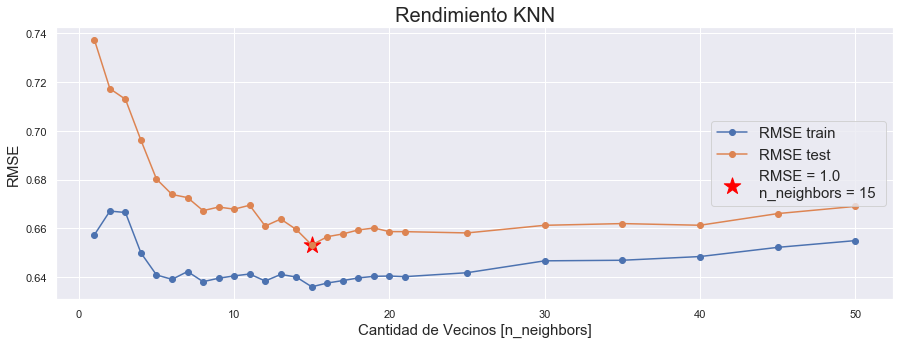

In [50]:
min_test_knn = np.amin(lista_rmse_test_knn)
lista_rmse_test_knn_op = lista_rmse_test_knn.index(min(lista_rmse_test_knn))
vecinos_op = vecinos[lista_rmse_test_knn_op]

print('Minimo de RMSE en test es ', min_test_knn,' en vecinos', vecinos_op)


plt.figure(figsize=(15,5))

plt.plot(vecinos, lista_rmse_train_knn, 'o-', label = 'RMSE train')
plt.plot(vecinos, lista_rmse_test_knn, 'o-', label = 'RMSE test')
plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento KNN', size = 20)
plt.scatter(vecinos_op, min_test_knn, s=300, marker = '*', 
         label = 'RMSE = {} \nn_neighbors = {} '.format(round(min_test_knn),vecinos_op), color = 'red')
plt.legend(loc = 'center right', fontsize = 15)
#plt.savefig('KNN1.png')

plt.show()

Seleccionando el parametro de vecinos en 15, optimizo y luego aplico resultados al dataset general.

In [51]:
knn_regressor = KNeighborsClassifier(n_neighbors = 15)
knn_regressor.fit(X_train, y_train)
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')


La raíz del error cuadrático medio en Train es de: 0.6549754205655616
La raíz del error cuadrático medio en Test es de: 0.6689908958947897


In [52]:
test_data = null_bathrooms.drop(['surface_total','surface_covered','bathrooms','l3','l2','property_type', 'title', 'description','int_price','intervalos_de_precio'],axis=1)
predicted_mussing_bathrooms = knn_clf.predict(test_data)
data.loc[data['bathrooms'].isna(), 'bathrooms'] = predicted_mussing_bathrooms

bathrooms2= data.bathrooms

In [53]:
print("Valores en la categoria bathrooms sin aplicar el modelo KNN")
print(bathrooms1.value_counts())
print("Valores en la categoria bathrooms despues de aplicar el modelo KNN")
print(bathrooms2.value_counts())

Valores en la categoria bathrooms sin aplicar el modelo KNN
1.0     72298
2.0     34082
3.0     11042
4.0      3269
5.0       989
6.0       241
7.0        82
8.0        13
9.0        10
10.0        8
11.0        7
14.0        6
13.0        2
12.0        1
Name: bathrooms, dtype: int64
Valores en la categoria bathrooms despues de aplicar el modelo KNN
1.0     85060
2.0     39528
3.0     13042
4.0      3906
5.0      1152
6.0       309
7.0        97
8.0        16
9.0        10
10.0        9
11.0        7
14.0        6
13.0        2
12.0        1
Name: bathrooms, dtype: int64


In [54]:
data.isnull().sum() #corroboro que el data este correcto y sin Nan bathrooms

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                   0
surface_total           18623
surface_covered         18909
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

**PA - 1.3. Tratamiento de VF surface_total y surface_covered**


Trabajaré ahora con los **faltantes de superfies** que son muy importantes para nuestro analisis ya que, como conozco del P1, tienen fuerte correlación con el precio.

Pero antes de esto, imputaré los valores de superficie cuvierta mayores a superficie total, algo que en el Proyecto 1 eliminamos rapidamente pero aqui intentaré salvar algunos registros. Ahora bien, ¿cuantas observaciones de error de superficie tenemos?

**Imputación Lógica**

In [55]:
error = data[data.surface_total < data.surface_covered] 
print('Hay {} observaciones con errores de carga en la superficie.'.format(error.shape[0]))
#error.shape

Hay 1420 observaciones con errores de carga en la superficie.


In [56]:
data.shape

(143145, 13)

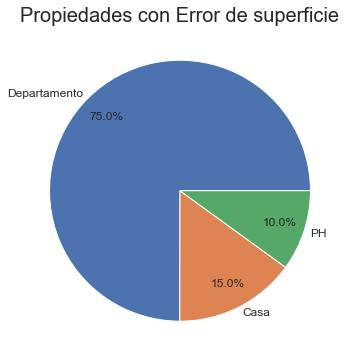

In [57]:
tipoerror = data["property_type"].value_counts()

fig1, ax1 = plt.subplots(figsize=(14,6))
ax1.pie(x = tipoerror,labels = tipoerror.index,
        autopct = '%1.1f%%',textprops = {'fontsize': 12},
        pctdistance = 0.8,labeldistance = 1.05)
plt.title("Propiedades con Error de superficie", size=20)

plt.show()

Me pregunto, ¿cuáles son las diferencias de m2 en las superficies cubiertas superiores a totales?

In [58]:
dif = data.surface_covered - data.surface_total
dif = dif[dif > 0]
dif.value_counts().sort_values(ascending=False)

1.0        513
10.0        36
20.0        34
3.0         29
5.0         26
          ... 
75.0         1
234.0        1
16930.0      1
146.0        1
16400.0      1
Length: 230, dtype: int64

In [59]:
mask = (data.surface_covered - data.surface_total) == 1
print('Diferencia de 1 metro cuadrado:', mask.sum())
mask


Diferencia de 1 metro cuadrado: 513


0         False
1         False
2         False
3         False
4         False
          ...  
146655    False
146656    False
146657    False
146658    False
146659    False
Length: 143145, dtype: bool

In [60]:
data2 = data[mask]
data2

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio
602,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1.0,1.0,1.0,32.0,33.0,65000.0,OPORTUNIDAD Venta Monoambiente Ituzaingo Centro,Corredor Responsable: Hernan Perrone - CMCPDJM...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
859,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
924,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
1329,Capital Federal,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
1438,Capital Federal,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134924,Capital Federal,Balvanera,3.0,2.0,2.0,75.0,76.0,110000.0,Departamento en Venta Balvanera con tres ambie...,Corredor Responsable: SANTIAGO CRUCIANI - CPI ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145138,Capital Federal,Caballito,1.0,1.0,1.0,24.0,25.0,54900.0,VENTA DEPTO MONOAMBIENTE- IDEAL INVERSOR-CABAL...,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145146,Capital Federal,San Nicolás,1.0,1.0,1.0,21.0,22.0,48000.0,Monoambiente exc ubicación 1 cuadra obelisco,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145262,Capital Federal,Villa Crespo,3.0,2.0,1.0,51.0,52.0,127000.0,Depto 3 ambientes.Muy buen estado. Villa crespo,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"


In [61]:
tipoerror2 = data2["property_type"].value_counts()
tipoerror2

Departamento    509
PH                2
Casa              2
Name: property_type, dtype: int64

De los 1420 errores destaco que 513 tienen una diferencia de 1 metro cuadrado.

Explorando concluyo que se tratan de errores de carga en su gran mayoria de tipo deptartamentos pero estimos que las superficies son iguales, entonces trataré de salvar registros, igualandolos.

In [62]:
data.loc[mask,'surface_covered'] = data.loc[mask,'surface_total'] #igualamos las que tienen diferencia de 1

In [63]:
error2 = data[data.surface_total < data.surface_covered] 
print('Quedan {} observaciones con errores de carga en la superficie.'.format(error2.shape[0]))

Quedan 907 observaciones con errores de carga en la superficie.


Imputaré los 907 registros con errores restantes.

In [64]:
data['surface_covered'] = np.where(data['surface_covered'] > data['surface_total'], data['surface_total'], data['surface_covered'])

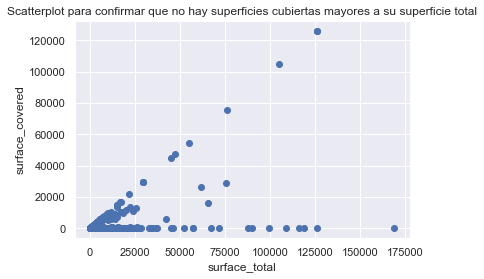

In [65]:
plt.scatter(x= data['surface_total'],
            y= data['surface_covered'])

plt.ylabel('surface_covered')
plt.xlabel('surface_total')
plt.title("Scatterplot para confirmar que no hay superficies cubiertas mayores a su superficie total")

plt.show()

In [66]:
error3 = data[data.surface_total < data.surface_covered] 
print('Quedan {} observaciones con errores de carga en la superficie.'.format(error3.shape[0]))

Quedan 0 observaciones con errores de carga en la superficie.


Ahora comienzo con la exploración de missing en las superficies, analizaré primero si hay una relación.

In [67]:
#Analizo si los VF en surface_total y surface_covered son MAR (que la probabilidad de valor faltante depende de otra variable).

data_missing['surface_covered-intervalo'] = pd.cut(data.surface_covered, bins  = 30)

C:\Users\eliza\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
vf_surface_covered_surface_total = data_missing.surface_total.isnull().groupby([data_missing['surface_covered-intervalo']]).sum().astype(int).reset_index(name='count')

In [69]:
vf_surface_covered_surface_total['freq'] = vf_surface_covered_surface_total['count']/data_missing.groupby([data_missing['surface_covered-intervalo']]).count()['surface_covered'].values
vf_surface_covered_surface_total['freq'].fillna(0, inplace=True)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalo', 'count', 'freq'], dtype='object')

In [70]:
vf_surface_covered_surface_total["bin_centres"] = vf_surface_covered_surface_total["surface_covered-intervalo"].apply(lambda x: x.mid)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalo', 'count', 'freq', 'bin_centres'], dtype='object')

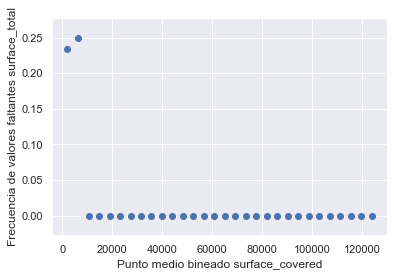

In [71]:
plt.scatter(vf_surface_covered_surface_total['bin_centres'], vf_surface_covered_surface_total['freq'])
plt.xlabel('Punto medio bineado surface_covered')
plt.ylabel('Frecuencia de valores faltantes surface_total')
plt.show()

No se encontró relacion de `surface_covered` a `surface_total`. Lo analizaré al contrario, de `surface_total` a `surface_covered`.

C:\Users\eliza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


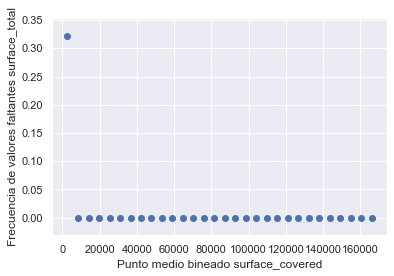

In [72]:
data_missing['surface_total-intervalo'] = pd.cut(data.surface_total, bins  = 30)
vf_surface_total_surface_covered = data_missing.surface_covered.isnull().groupby([data_missing['surface_total-intervalo']]).sum().astype(int).reset_index(name='count')
vf_surface_total_surface_covered['freq'] = vf_surface_total_surface_covered['count']/data_missing.groupby([data_missing['surface_total-intervalo']]).count()['surface_total'].values
vf_surface_total_surface_covered['freq'].fillna(0, inplace=True)
vf_surface_total_surface_covered["bin_centres"] = vf_surface_total_surface_covered["surface_total-intervalo"].apply(lambda x: x.mid)
plt.scatter(vf_surface_total_surface_covered['bin_centres'], vf_surface_total_surface_covered['freq'])
plt.xlabel('Punto medio bineado surface_covered')
plt.ylabel('Frecuencia de valores faltantes surface_total')
plt.show()

Tampoco se ve relacion causal en los missing de `surface_covered` a `surface_total`.

In [73]:
data_missing_surfaces = data[data.surface_covered.isnull() | data.surface_total.isnull()]
print(data_missing_surfaces.shape)

data_missing_total = data_missing_surfaces[data_missing_surfaces.surface_total.isnull()]
print(data_missing_total.shape)
data_missing_covered = data_missing_surfaces[data_missing_surfaces.surface_covered.isnull()] 
print(data_missing_covered.shape)

(19419, 13)
(18623, 13)
(18909, 13)


Me pregunto y empiezo a explorar sobre cuántas instancias carecen de un sólo dato de superficie, ya que estas pueden ser imputadas por el valor de "la otra" superficie. Esto seguramente por un error de carga - MNCRA

In [74]:
both_sup = data_missing_surfaces[data_missing_surfaces.surface_total.isnull() &
                                      data_missing_surfaces.surface_covered.isnull()]
both_sup

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio
723,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7654) Venta de Departamento 2 ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
727,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7651) Venta de Departamento 2 ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
728,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7650) Venta de Departamento 2 ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
890,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,120000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7648) Venta de Departamento 3 ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
891,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,95000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7655) Venta de Departamento 3 ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145551,Bs.As. G.B.A. Zona Oeste,Moreno,4.0,3.0,2.0,NaN,NaN,72000.0,Casa - Paso Del Rey,--- Agregar descripcion ---,Casa,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145553,Bs.As. G.B.A. Zona Oeste,Morón,4.0,3.0,1.0,NaN,NaN,170000.0,Casa - Castelar,Castelar: Casa de 4 ambientes muy luminoso<br>...,Casa,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145562,Bs.As. G.B.A. Zona Sur,San Vicente,4.0,3.0,2.0,NaN,NaN,360000.0,Casa - San Vicente,Importante propiedad en San Eliseo Country Clu...,Casa,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
145597,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,NaN,259000.0,PH de 4 Amb. en Planta Baja con Patio. S/ Expe...,"Venta de PH 4 AMBIENTES en Villa Urquiza, Capi...",Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"


In [75]:
print('Cantidad de instancias que con superficie total y cubierta como faltantes:', both_sup.shape)

Cantidad de instancias que con superficie total y cubierta como faltantes: (18113, 13)


In [76]:
only_total = ~ data_missing_surfaces.surface_covered.isnull()
dataVF_only_total = data_missing_surfaces[only_total]
dataVF_only_total.head(5)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio
2506,Capital Federal,Palermo,3.0,2.0,1.0,NaN,1.0,236000.0,3 Ambientes a estrenar c/ cochera y parrilla e...,Moderno departamento de 3 ambientes a estrenar...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
3172,Capital Federal,Villa General Mitre,4.0,3.0,1.0,NaN,75.0,210000.0,Villa Gral. Mitre*TODO LUZ*3 Dormitorios Cochera,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
3859,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,1.0,NaN,76.0,60000.0,Duplex en primer piso en venta!!!,Corredor Responsable: Hernan Perrone - Corredo...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
4082,Capital Federal,Floresta,3.0,2.0,1.0,NaN,65.0,124000.0,3 AMBIENTES AL FRENTE CON BALCON,"DEPARTAMENTO PISO 3° AL FRENTE, 2 DORMITORIOS ...",Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
4257,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,1.0,NaN,1.0,165000.0,Barrio cerrado Nordelta - El Palmar - Departam...,"Edificio INFINITY, excelente vista! Muy buen d...",Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"


In [77]:
print('Cantidad de instancias que sólo falta superficie total data: ', only_total.sum())

Cantidad de instancias que sólo falta superficie total data:  510


In [78]:
only_cover = ~ data_missing_surfaces.surface_total.isnull()
dataVF_only_cover = data_missing_surfaces[only_cover]
dataVF_only_cover.head(5)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,int_price,intervalos_de_precio
722,Capital Federal,Colegiales,2.0,1.0,1.0,35.0,NaN,89000.0,DEPARTAMENTO 2 AMB. IDEAL INVERSOR/PRIMERA VIV...,Departamento de 2 ambientes. EXPENSAS BAJASLiv...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
913,Capital Federal,Puerto Madero,3.0,2.0,3.0,165.0,NaN,690000.0,Venta Departamento en Puerto Madero Capital Fe...,"Departamento en Venta, , con una superficie t...",Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
3094,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,1.0,70.0,NaN,75000.0,3 Ambientes. Excelente estado,3 ambientes contrafrente en planta alta por es...,Departamento,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
3434,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,1.0,430.0,NaN,250000.0,Casa Ideal Inversionista Lote 10x43,PARA VISITAR LA PROPIEDAD COMUNICARSE AL // 1...,Casa,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"
3892,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,6.0,3.0,2.0,315.0,NaN,177000.0,Casa 3 dorm. gge y fondo libre,La vivienda se encuentra ubicada en la calle 2...,Casa,"(-26428.232, 1086941.067]","(-26428.232, 5410705.333]"


In [79]:
print('Cantidad de instancias que sólo falta superficie cubierta: ', only_cover.sum())

Cantidad de instancias que sólo falta superficie cubierta:  796


In [80]:
data.isna().sum()

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                   0
surface_total           18623
surface_covered         18909
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

Ya teniendo dimension de las mascaras que crearemos y aplicaremos en nuestro dataset, aplicamos:

1. mascara de VF de superficie cubierta que tengan valores de superficie total y asignar esos valores a los VF.
2. mascara de VF de superficie total con valores de superficie cubierta y asignar estos valores a los VF de superficie total.

Imputariamos así  510 instancias de sup. total y 796 de superficie cubierta. En total 1306 faltantes menos. Deberían quedar ambas columnas con la misma cantidad de faltantes, en 18113.

In [81]:
data.isnull().sum()

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                   0
surface_total           18623
surface_covered         18909
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

In [82]:
mask_sup1 = data[~data.surface_total.isnull()]
mask_sup1.isnull().sum()

l2                        0
l3                        0
rooms                     0
bedrooms                  0
bathrooms                 0
surface_total             0
surface_covered         796
price                     0
title                     0
description               0
property_type             0
int_price                 0
intervalos_de_precio      0
dtype: int64

Tengo originalmente 796 registros nulos sólo de sup. cubierta

In [83]:
mask_sup2 = data[~data.surface_covered.isnull()] #filtrado 
mask_sup2.isnull().sum()

l2                        0
l3                        0
rooms                     0
bedrooms                  0
bathrooms                 0
surface_total           510
surface_covered           0
price                     0
title                     0
description               0
property_type             0
int_price                 0
intervalos_de_precio      0
dtype: int64

Tengo originalmente 510 registros nulos sólo de sup. total.

Ahora entonces, relleno los faltantes de una por otra en estas instancias.

In [84]:
data['surface_covered'].fillna(value = data.surface_total, axis=0, inplace=True)
data['surface_total'].fillna(value = data.surface_covered, axis=0, inplace=True)

In [85]:
data.isnull().sum() #confirmo

l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                   0
surface_total           18113
surface_covered         18113
price                       0
title                       0
description                 0
property_type               0
int_price                   0
intervalos_de_precio        0
dtype: int64

In [86]:
data = data.drop(['int_price','intervalos_de_precio'], axis=1) #elimino filas de intervalos ya usados

In [87]:
data.shape

(143145, 11)

In [88]:
data_missing = data[data.isnull().any(axis=1)]
print(data_missing.shape)
data_missing.head(5)

(18113, 11)


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
723,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7654) Venta de Departamento 2 ...,Departamento
727,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7651) Venta de Departamento 2 ...,Departamento
728,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,NaN,NaN,75000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7650) Venta de Departamento 2 ...,Departamento
890,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,120000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7648) Venta de Departamento 3 ...,Departamento
891,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0,2.0,1.0,NaN,NaN,95000.0,DEPARTAMENTO EN VENTA,Xintel (RUS-RUS-7655) Venta de Departamento 3 ...,Departamento


Bien. Ahora tenemos instancias en las cuales faltan ambas superficies. 


Considero entonces que podría salvar estos 18.113 registros usando un método de Machine Learning el cual utilize calculos estadisticos con los demás registros. Por lo tanto, me decidí implementar el modelo `IterativeImputer` el cual efectivamente, permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. La implementación de `sklearn.impute.IterativeImputer` permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).

En primera instancia intenté con el modelo `KNNImputer` sin embargo me daba error de Memoria, ya que mi computadora no cumple con los requisitos para poder implementar tal modelo con tal magnitud, por tener l2. En segunda instancia intenté entonces con el más recomendado, Random Forest: `IterativeImputerestimator RandomForestRegressor()`.

In [89]:
 #Luego de normalizar y escalar quise implementar estos 2 modelos

#from sklearn.ensemble import RandomForestRegressor       
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

#data_filled = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
#data_filled = IterativeImputer(max_iter=10, random_state=0)
#data_filled.fit(data_scaler)
#display(pd.DataFrame(data_filled.transform(data_scaler)))

In [90]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors = 5)
#df_filled = imputer.fit_transform(data_scaler)

Sin embargo, luego de casi 24 hs de dejar que se implemente sin exito y hasta intentar simplemente con `IterativeImputerestimator`, decido entonces entender qué representa esta porcion en mi dataset total y tomar la decisión de elimminarlas definitivamente, ya que, siendo estas dos columnas tan importantes en su relación con la variable precio, necesito que estos datos sean lo más objetivos prosibles.

In [91]:
((data.isnull().sum()*100)/data.count())

l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           0.000000
surface_total      14.486691
surface_covered    14.486691
price               0.000000
title               0.000000
description         0.000000
property_type       0.000000
dtype: float64

In [92]:
data = data.dropna()

In [93]:
data.isnull().sum() # confirmo no tener nulos

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64

### PA - 2. Tratamiento de Outliers

Primeramente procedo a filtrar valores atípicos, un método muy usado es filtrar los valores de una variable utilizando el IQR (rango intercuartilico), que a diferencia del proyecto anterior (que usé como límite el procentil 99) aplicaré sabiendo que es lo mejor en este caso.

In [94]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,1.250320e+05
mean,3.126136,2.065511,1.586578,182.021171,103.974175,2.430806e+05
std,1.387821,1.081496,0.874451,1433.854109,730.815530,2.983364e+05
min,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.150000e+05
50%,3.000000,2.000000,1.000000,78.000000,67.500000,1.695000e+05
75%,4.000000,3.000000,2.000000,138.000000,107.000000,2.680000e+05
max,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


Aquí vuelvo a marcar algunos aspectos:

`rooms`:
En esta instancia puedo destacar el número máximo de ambientes en un inmueble de 35. Lo cual es excesivo y atípico a mi criterio, seguramente se trate de un outlier (valor atípico).

`bedrooms`:
En cuanto a las habitaciones, notamos que hay anuncios con valores de 0, seguramente se trate de monoambientes que podemos corroborar más adelante ya que lo coherente es que se trate como tipo de propiedad 'Departamento'. Y además, un máximo de 15 habitaciones, al igual que en 'rooms', entendemos que se trata también de un outlier.

`bathbrooms`:
Misma lectura que en ´rooms´, aca podemos destacar un outlier en su valor máximo de 14 baños en una propiedad, siendo veridico o no, entendemos que un inmueble con 14 baños no es algo tipico.


A toda esta lectura le puedo sumar que **lo que más me llama la atención en estos números es la diferencia entre la instancia q muestra el 75% de la muestra y la instancia del valor máximo en el atributo.** La diferencia aquí es sustancial en `rooms`, `bedrooms`, `bathbrooms`, `surface_total` y `surface_covered` (outliers o errores); por ejemplo imaginar una propiedad con una superficie total de 126.062 m2 es algo realmente atípico a mi criterio, pues nos enfrentamos a valores que en este punto estimo que serán muy importantes en la influencia al obtener el precio de una propiedad. Los exploraremos a continuación.

In [95]:
fig = plt.figure(figsize=(12,12)) #hay correlaciones?

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
#sns.pairplot(data[columns], hue="property_type")

plt.show()

<Figure size 864x864 with 0 Axes>

Ya conociendo este dataset, sé que contiene muchos errores de muchos tipos (de tipeo, de marcado de anuncios, de carga...) contiene sobre todo muchos anuncios mal cargados o incoherentes. Ahora, de manera más simple, me propongo aquí, explorar cada feature para confirmar esto y filtrar los valores utilizando el IQR (rango intercuartilico) logica del conocimiento de negocio, dejando constancia de ello.

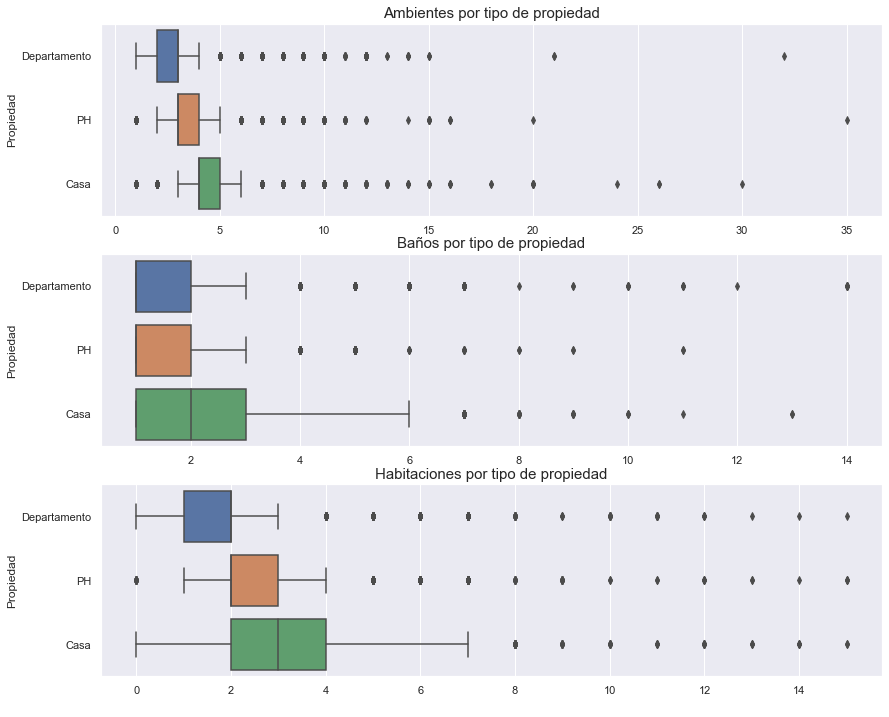

In [96]:
#comienzo trabajando con las categorias numericas continuas
plt.figure(figsize = (14,12)) 

plt.subplot(3,1,1)
sns.boxplot(data=data, x='rooms', y='property_type')
plt.title('Ambientes por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,2)
sns.boxplot(data=data, x='bathrooms', y='property_type')
plt.title('Baños por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,3)
sns.boxplot(data=data, x='bedrooms', y='property_type')
plt.title('Habitaciones por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.show()

Profundizaremos ahora detenídamente por categoria en sus valores que se alejan de la media y su IQR (rango intercuartilico).

In [97]:
print('Ambientes:\n', data.rooms.value_counts().sort_index()) #¿cuántos valores tenemos por unidades?

Ambientes:
 1.0      8265
2.0     36242
3.0     39423
4.0     25615
5.0      9087
6.0      3567
7.0      1541
8.0       751
9.0       210
10.0      177
11.0       44
12.0       49
13.0       11
14.0       11
15.0       15
16.0        7
18.0        2
20.0        7
21.0        2
24.0        1
26.0        2
30.0        1
32.0        1
35.0        1
Name: rooms, dtype: int64


Q25:  2.0 
Q75:  4.0 
IQR:  2.0
Rango óptimo MAX:  7.0


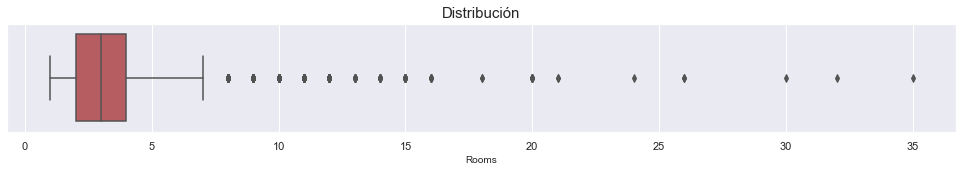

In [98]:
q25,q75 = np.percentile(data.rooms, 25), np.percentile(data.rooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75+1.5*iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data['rooms'], color='r')
plt.xlabel('Rooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

Luego de éstos calculos y grafico de cajas, quiero ver de qué se tratan los anucios con más de 7 'rooms'.

In [99]:
data[data.rooms >= 7].head(10)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...","Casa en venta , muy buena ubicación, zona tran...",Casa
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,18 entre 491 y 491 bis. Casa desarrollada en d...,Casa
282,Capital Federal,Palermo,7.0,3.0,3.0,327.0,224.0,1000000.0,"Pent house, BALCÓN TERRAZA, COCHERA y parrilla...","Lindísimo Pent house RECICLADO, rodeado de TER...",Departamento
424,Capital Federal,Recoleta,7.0,3.0,3.0,308.0,308.0,1100000.0,Espectacular Piso 300 m2 con cochera en Recoleta,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento
456,Capital Federal,Villa del Parque,10.0,8.0,4.0,2000.0,1400.0,5000000.0,"Venta de Casa,Villa del Parque,1400m2,",Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
457,Bs.As. G.B.A. Zona Sur,Avellaneda,8.0,6.0,4.0,535.0,535.0,650000.0,Importante casa con quincho pileta y departamento,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa
496,Bs.As. G.B.A. Zona Sur,San Vicente,7.0,3.0,3.0,814.0,236.0,370000.0,CASA VISTA A LA LAGUNA SANTA RITA,Corredor Responsable: Martin Manias - CMCLZ 40...,Casa
506,Bs.As. G.B.A. Zona Sur,La Plata,9.0,4.0,3.0,741.0,245.0,365000.0,Casa cuatro dormitorios en venta City Bell,Corredor Responsable: Rico Sebastián - Martill...,Casa
511,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,8.0,4.0,2.0,223.0,108.0,140000.0,CASA Y DEPARTAMENTO EN LUIS GUILLON,Corredor Responsable: Martin Manias - CMCLZ 40...,Casa


In [100]:
data[(data["rooms"] == 1) & (data["bedrooms"] == 0)].sample(10)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
44621,Bs.As. G.B.A. Zona Sur,La Plata,1.0,0.0,1.0,36.0,34.0,65000.0,DEPARTAMENTO EN VENTA,Xintel (JSP-JSP-982) Venta de Departamento MON...,Departamento
61275,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,1.0,0.0,1.0,24.0,20.0,45000.0,DEPARTAMENTO EN VENTA,Xintel (YAR-YAR-15952) VENTA de Departamento e...,Departamento
49598,Capital Federal,Palermo,1.0,0.0,1.0,38.0,33.0,135000.0,DEPARTAMENTO EN VENTA,Xintel (BRV-BRV-477) Venta de Departamento MON...,Departamento
35298,Capital Federal,Villa Urquiza,1.0,0.0,1.0,35.0,32.0,105000.0,DEPARTAMENTO EN VENTA,Xintel (BRV-BRV-283) Venta de Departamento MON...,Departamento
78280,Capital Federal,Villa Crespo,1.0,0.0,1.0,35.0,35.0,114000.0,DEPARTAMENTO EN VENTA,Xintel (ZET-ZET-1028) Venta de Departamento MO...,Departamento
111654,Capital Federal,Mataderos,1.0,0.0,1.0,48.0,19.0,55000.0,DEPARTAMENTO EN VENTA,Xintel / 5898 / 5514<br> - - NIRO OPERACIONE...,Departamento
132633,Capital Federal,Monte Castro,1.0,0.0,1.0,35.0,31.0,80000.0,DEPARTAMENTO EN VENTA,Xintel (ANT-ANT-262) <p>Alquiler de Departamen...,Departamento
35925,Capital Federal,Villa Urquiza,1.0,0.0,1.0,40.0,5.0,115000.0,DEPARTAMENTO EN VENTA,Xintel (HSP-HSP-272) VENTA MONOAMBIENTE CON BA...,Departamento
21266,Capital Federal,Mataderos,1.0,0.0,1.0,30.0,30.0,82000.0,DEPARTAMENTO EN VENTA,Xintel (LEG-LEG-785) <p>CON RENTA ASEGURADA --...,Departamento
92999,Capital Federal,Palermo,1.0,0.0,1.0,35.0,30.0,125000.0,DEPARTAMENTO EN VENTA,Xintel (CRY-CRY-70) Venta de Departamento MONO...,Departamento


Los anuncios con room 1 y bedroom 0 suelen ser Monoambientes como estimaba.

In [101]:
print('Las propiedades con más de 7 ambientes respresentan el', 
      round((data[data.rooms > 8].shape[0]/data.rooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 7 ambientes respresentan el 0.43 % de nuestro dataset al momento.


Al `title` de los anuncios de venta que las propiedades con un valor mayor de 7 ambientes se puede apreciar que algunas son viviendas multifamiliares, hostels, centros médicos. Tambien observo varios errores en los anuncios, como por ejemplo uno que en realidad dice 'venta de 9 departamentos' y figura como uno sólo con 9 ambientes. En este caso se tratan de errores de tipeo o carga de datos.
Por lo que decido hacer un filtrado a todas las propiedades con un valor menor razonable de 7 `rooms` al representar un porcentaje muy minoritario del dataset y no es representativo para trabajar nuestras prediciones.

Ahora, trataremos `Bedrooms`:

In [102]:
print('Dormitorios:\n',data.bedrooms.value_counts().sort_index())

Dormitorios:
 0.0       624
1.0     44345
2.0     41289
3.0     28175
4.0      7941
5.0      1702
6.0       571
7.0       242
8.0        54
9.0        24
10.0       19
11.0       13
12.0       15
13.0        6
14.0        6
15.0        6
Name: bedrooms, dtype: int64


Q25:  1.0 
Q75:  3.0 
IQR:  2.0
Rango óptimo MAX:  6.0


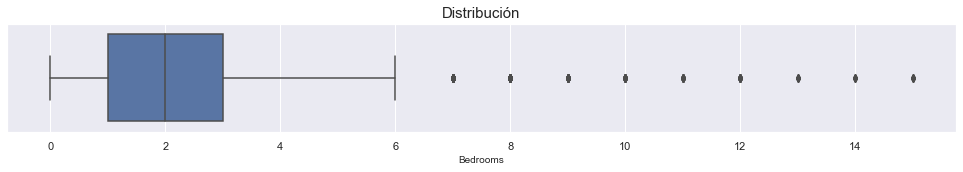

In [103]:
q25,q75 = np.percentile(data.bedrooms, 25), np.percentile(data.bedrooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75 + 1.5* iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data['bedrooms'])
plt.xlabel('Bedrooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

In [104]:
data[data.bedrooms >= 6].head(10)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
456,Capital Federal,Villa del Parque,10.0,8.0,4.0,2000.0,1400.0,5000000.0,"Venta de Casa,Villa del Parque,1400m2,",Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
457,Bs.As. G.B.A. Zona Sur,Avellaneda,8.0,6.0,4.0,535.0,535.0,650000.0,Importante casa con quincho pileta y departamento,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa
513,Bs.As. G.B.A. Zona Norte,Tigre,7.0,6.0,2.0,2870.0,186.0,425000.0,CASA QUINTA EN VENTA EN DON TORCUATO. IMPERDIB...,Corredor Responsable: Uno Bienes Raices SRL - ...,Casa
557,Capital Federal,Congreso,6.0,6.0,2.0,230.0,230.0,295000.0,"PH en Venta - 230 m2. Ideal vs familias, sin exp",Corredor Responsable: JUAN FRANCISCO CARATTINO...,PH
584,Capital Federal,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,Excepcional Ph en 3 plantas ubicado en Palermo...,PH
585,Bs.As. G.B.A. Zona Norte,General San Martín,8.0,6.0,2.0,216.0,170.0,260000.0,Excelentes 2 ph ideal dos familias VILLA BALLE...,Corredor Responsable: Luis Varela - CSI 5527 /...,PH
587,Bs.As. G.B.A. Zona Oeste,La Matanza,8.0,7.0,6.0,600.0,500.0,680000.0,CASA EN VENTA,Xintel (BAT-BAT-2293) Venta de Casa 8 AMBIENTE...,Casa
1096,Capital Federal,Balvanera,6.0,6.0,1.0,73.0,73.0,135000.0,INVERSORES!!! DEPTO ANTIGUO A REFACCIONAR,Corredor Responsable: Maria Martínez Vila - CU...,PH
1116,Bs.As. G.B.A. Zona Norte,Pilar,7.0,6.0,3.0,11000.0,350.0,450000.0,Impactante casa quinta inmersa en PILAR,Corredor Responsable: Luis Varela - CSI 5527 /...,Casa


In [105]:
print('Las propiedades con más de 6 dormitorios respresentan el', 
      round((data[data.bedrooms > 7].shape[0]/data.bedrooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 6 dormitorios respresentan el 0.11 % de nuestro dataset al momento.


<code>Caso Bathrooms</code>

In [106]:
print('Baños:\n',data.bathrooms.value_counts().sort_index())

Baños:
 1.0     74304
2.0     34821
3.0     11220
4.0      3314
5.0      1000
6.0       244
7.0        82
8.0        13
9.0        10
10.0        8
11.0        7
12.0        1
13.0        2
14.0        6
Name: bathrooms, dtype: int64


Q25:  1.0 
Q75:  2.0 
IQR:  1.0
Rango óptimo MAX:  3.5


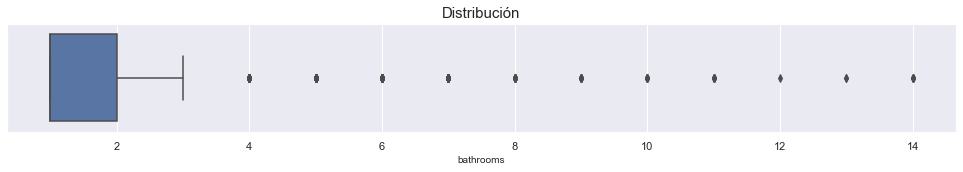

In [107]:
q25,q75 = np.percentile(data.bathrooms, 25), np.percentile(data.bathrooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75 + 1.5* iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data['bathrooms'])
plt.xlabel('bathrooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

Destaco a pesar del IQR en 3,4 o 4 que puedo dejar los valores en 5 baños por propiedad ya que puedo ver que los valores se vuelven alejados luego de este numero y trato de no cortar tajante los registros.

In [108]:
data[data.bathrooms >= 5].head(10)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
310,Capital Federal,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,ALVEAR TOWER.Espectacular departamento en el e...,Departamento
325,Capital Federal,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,Torre Bellini - Palermo Chico - 4 amb con dep ...,Hermoso piso alto con vista abierta y terminac...,Departamento
327,Capital Federal,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,5 amb con dep - 2 cocheras y baulera - Torre B...,Hermoso piso alto con vista abierta y terminac...,Departamento
530,Bs.As. G.B.A. Zona Norte,Pilar,5.0,3.0,5.0,860.0,690.0,1300000.0,Impresionante casa de lujo amoblada exquisitam...,Corredor Responsable: MIRIAM CORRADO - CMCPDJQ...,Casa
584,Capital Federal,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,Excepcional Ph en 3 plantas ubicado en Palermo...,PH
587,Bs.As. G.B.A. Zona Oeste,La Matanza,8.0,7.0,6.0,600.0,500.0,680000.0,CASA EN VENTA,Xintel (BAT-BAT-2293) Venta de Casa 8 AMBIENTE...,Casa
1109,Capital Federal,Villa Devoto,6.0,3.0,5.0,720.0,460.0,1500000.0,Casa venta Devoto 6 amb. Jardín y 3 cocheras,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
1163,Bs.As. G.B.A. Zona Norte,San Miguel,9.0,7.0,7.0,2878.0,748.0,740000.0,"Venta Bella Vista: Ideal Petit Hotel, Spa Bout...",Corredor Responsable: Marcelo Trujillo - CUCIC...,Casa
1582,Bs.As. G.B.A. Zona Oeste,Hurlingham,10.0,5.0,5.0,937.0,415.0,185000.0,VENTA 5 DEPARTAMENTOS 2 Y 3 AMB HURLINGHAM,Corredor Responsable: Mariano Menendez - CMCPM...,Casa
1583,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,7.0,5.0,6.0,938.0,786.0,1500000.0,CASA VENTA RESIDENCIAL en BANFIELD,Corredor Responsable: Carlos Belsito - C.M.C.P...,Casa


In [109]:
print('Las propiedades con más de 5 baños respresentan el', 
      round((data[data.bathrooms > 6].shape[0]/data.bathrooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 5 baños respresentan el 0.1 % de nuestro dataset al momento.


Ahora trataré en base a data los features `surface_total`, `surface_covered` y `price` que contienen **variables** cuantitativas distintas a las anteriores, es decir son **continuas**.

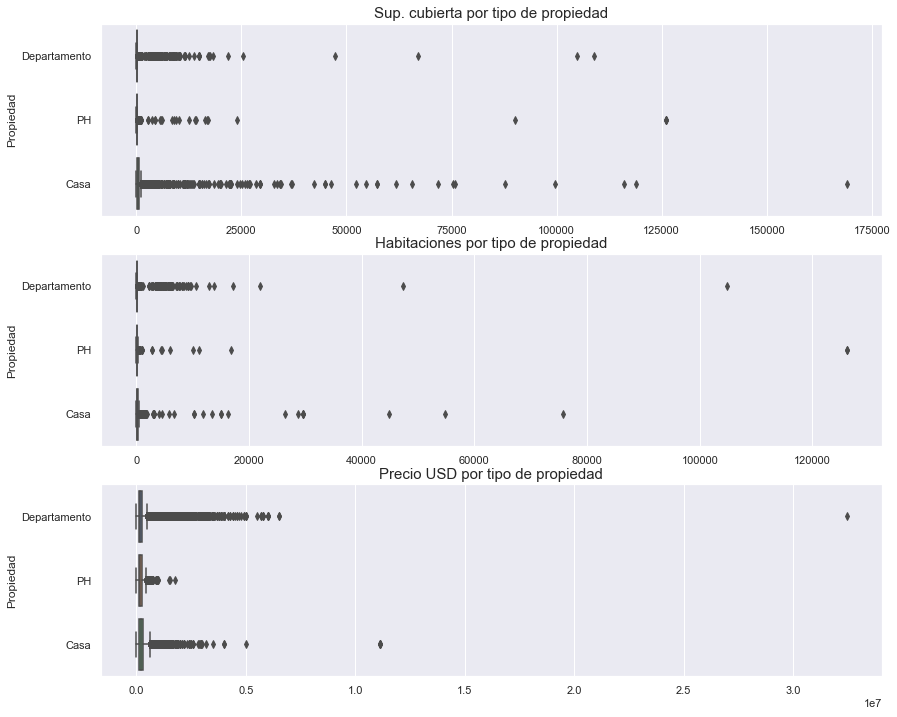

In [110]:
plt.figure(figsize = (14,12)) 

plt.subplot(3,1,1)
sns.boxplot(data=data, x='surface_total', y='property_type')
plt.title('Sup. cubierta por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,2)
sns.boxplot(data = data, x = 'surface_covered', y='property_type')
plt.title('Habitaciones por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,3)
sns.boxplot(data = data, x = 'price', y='property_type')
plt.title('Precio USD por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.show()

De estos gráficos podemos ver mucho más acentuados los **valores atipicos** que en los features continuos anteriores.

Empezare explorando los valores de `price`:

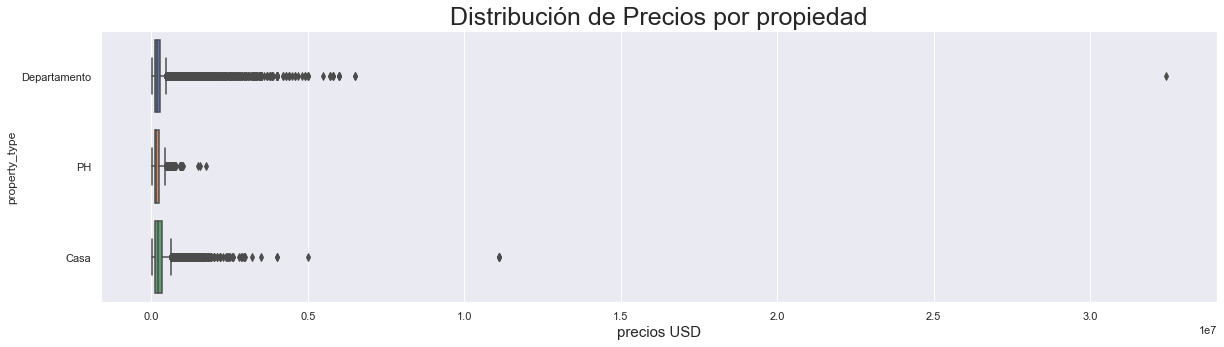

In [111]:
plt.figure(figsize = (20,5)) 
sns.boxplot( x = 'price', y = 'property_type', data = data)
plt.xlabel('precios USD', size = 15)
plt.title('Distribución de Precios por propiedad',size = 25)
plt.show()

In [112]:
q1_price = data['price'].quantile(0.25)
q3_price = data['price'].quantile(0.75)
iq_price = q3_price - q1_price
op_price = q3_price+1.5*iq_price

print("Primer cuartil: {}".format(q1_price))
print("Tercer cuartil: {}".format(q3_price))
print("Rango intercuartílico: {}".format(iq_price))
print("Rango óptimo MAX: {}".format(op_price))

Primer cuartil: 115000.0
Tercer cuartil: 268000.0
Rango intercuartílico: 153000.0
Rango óptimo MAX: 497500.0


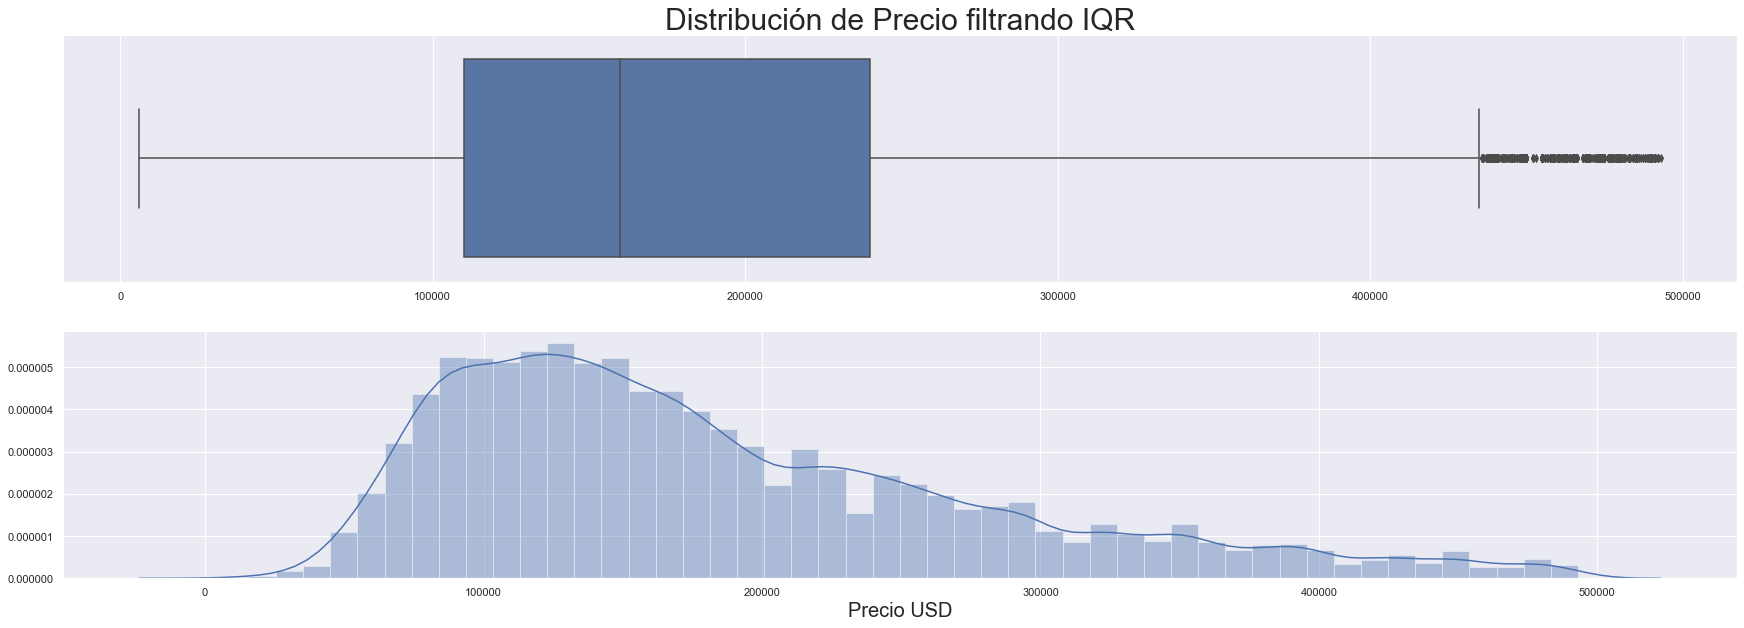

In [113]:
op_price = data['price'] < 493162

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data['price'][op_price])
plt.xlabel("")
plt.title('Distribución de Precio filtrando IQR', size = 30)

plt.subplot(2,1,2)
sns.distplot(data['price'][op_price])
plt.xlabel('Precio USD', size = 20)

plt.show()

In [114]:
data[(data['price'] > 493162)] 

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
152,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,163.0,118.0,650000.0,NORDELTA | ACQUA RIO - Excelente Departamento ...,Espectacular departamento de 3 ambientes con v...,Departamento
160,Capital Federal,Retiro,3.0,2.0,1.0,106.0,106.0,498000.0,VENTA depto excelente vista Rio 2 dormit depen...,"LIVING/COMEDOR, 2 DORMITORIOS, 1 BAÑO COMPLETO...",Departamento
171,Capital Federal,Palermo,3.0,2.0,2.0,99.0,99.0,690000.0,VENTA en TORRES DECO PALERMO 99 m2 con cochera...,"TORRES DECÓ PALERMO - Tprre RosedalDistinción,...",Departamento
172,Capital Federal,Palermo,3.0,2.0,3.0,100.0,100.0,560000.0,PALERMO UNO Torre full Amenities Unico y Excel...,Cochera no incluida en el preco U$S40000Excele...,Departamento
174,Capital Federal,Palermo,3.0,2.0,3.0,100.0,100.0,560000.0,Torre full Amenities Unico y Excelente Duplex ...,Cochera no incluida en el preco U$S40000Excele...,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
146606,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa
146607,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa
146608,Bs.As. G.B.A. Zona Norte,Pilar,7.0,5.0,4.0,450.0,450.0,1300000.0,POLLEDO PROPIEDADES VENTA CON RENTA. TORTUGAS ...,Lindisima casa a estrenar. Amplios ambientes J...,Casa
146631,Bs.As. G.B.A. Zona Norte,Tigre,5.0,3.0,3.0,240.0,213.0,650000.0,SOL EXC.VISTA VERDE Y RÍO COHERA-AMARRA-SEVICI...,Excelente Dúplex con importantes detalles de d...,Departamento


In [115]:
print('Las propiedades con precio de más de 493162 USD respresentan el', 
      round((data[data.price > 493163].shape[0]/data.price.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con precio de más de 493162 USD respresentan el 7.74 % de nuestro dataset al momento.


Exploraré ahora `surface_total`:


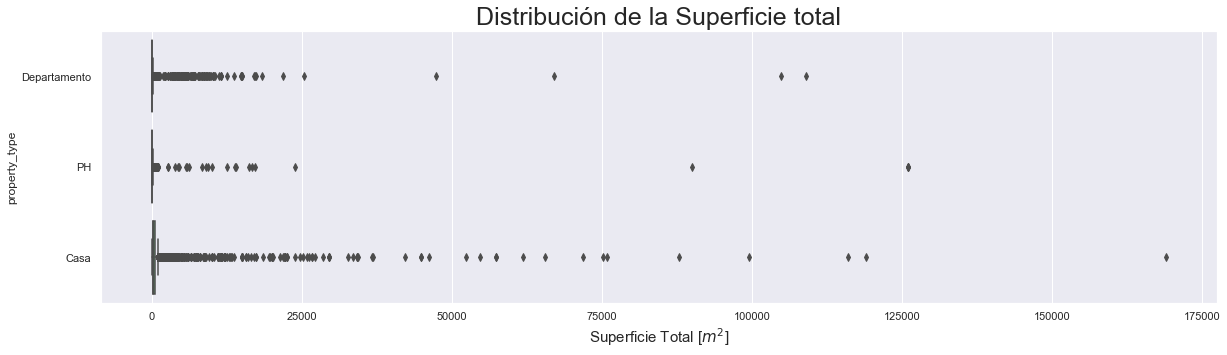

In [116]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'surface_total', y = 'property_type', data = data)
plt.xlabel('Superficie Total [$m^{2}$]', size = 15)
plt.title('Distribución de la Superficie total',size = 25)
plt.show()

In [117]:
q1_sup = data['surface_total'].quantile(0.25)
q3_sup = data['surface_total'].quantile(0.75)
iq_sup = q3_sup - q1_sup
op = q3_sup+1.5*iq_sup


print("Primer cuartil: {}".format(q1_sup))
print("Tercer cuartil: {}".format(q3_sup))
print("Rango intercuartílico: {}".format(iq_sup))
print("Rango óptimo MAX: {}".format(op))

Primer cuartil: 52.0
Tercer cuartil: 138.0
Rango intercuartílico: 86.0
Rango óptimo MAX: 267.0


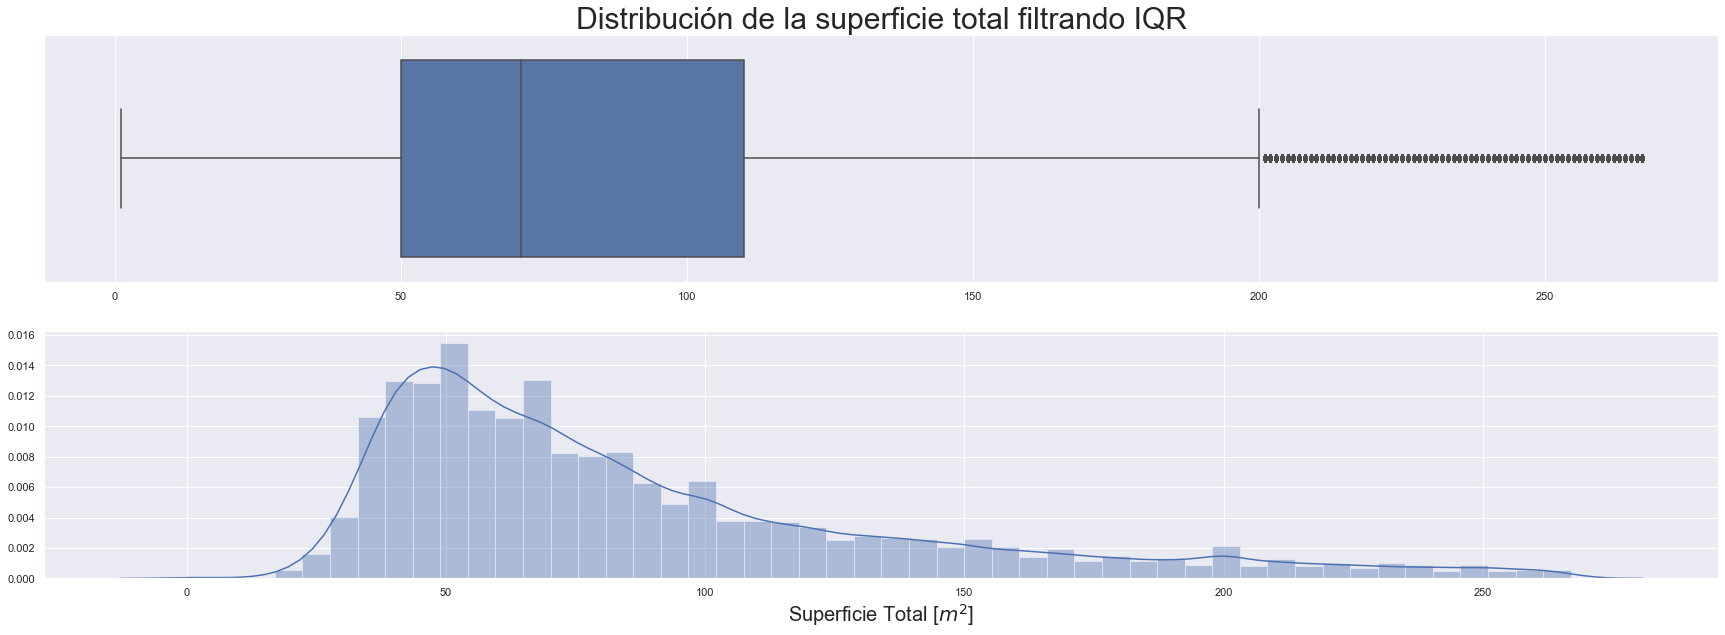

In [118]:
op_sup = data['surface_total'] < 268 

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data['surface_total'][op_sup])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando IQR', size = 30)

plt.subplot(2,1,2)
sns.distplot(data['surface_total'][op_sup])
plt.xlabel('Superficie Total [$m^{2}$]', size = 20)

plt.show()

Aquí podemos notar, que luego de los 200 m2 de superficie total comienzan a haber "outliers". Es decir, poniendolo en palabras es un inmueble de más dos cuadras, algo que parece muy extraño para la Ciudad de Buenos Aires y G.B.A. Por lo que voy a explorar de qué tipo se tratan:

In [119]:
data[data.surface_total > 268].head(20)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,ITUZAINGO NORTE: Casa tres ambientes con gara...,Casa
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...","Casa en venta , muy buena ubicación, zona tran...",Casa
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,18 entre 491 y 491 bis. Casa desarrollada en d...,Casa
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,"Casa en Venta, CASA EN VENTA EN LOMAS DE SAN I...",Casa
255,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,4.0,3.0,3.0,341.0,212.0,11111111.0,VENTA CASA EN CASEROS,Venta casa en Caseros desarrollada en 2 planta...,Casa
274,Capital Federal,Palermo,6.0,3.0,2.0,304.0,304.0,1480000.0,VENTA PALERMO,"Superficie: 304,30m2Características:FrenteMuy ...",Departamento
280,Capital Federal,Palermo,6.0,3.0,3.0,276.0,276.0,1680000.0,Piso ALTO en DUPLEX U$1.680.000 vista a Monu...,Piso de gran categoríaRegia vista a parquesRec...,Departamento
282,Capital Federal,Palermo,7.0,3.0,3.0,327.0,224.0,1000000.0,"Pent house, BALCÓN TERRAZA, COCHERA y parrilla...","Lindísimo Pent house RECICLADO, rodeado de TER...",Departamento
323,Capital Federal,Palermo,5.0,4.0,3.0,357.0,125.0,420000.0,EXCELENTE DEPARTAMENTO TIPO CASA BARRIO DE PA...,"Planta baja al contrafrente, con amplio patio ...",Departamento
324,Capital Federal,Palermo,5.0,4.0,3.0,330.0,276.0,2200000.0,"TORRE BELLINI, PISO ALT0, 2 COCHERAS","CONFORTABLE Y ESTRATEGICAMENTE UBICADA, TORRE ...",Departamento


Observo que se trata de viviendas multifamiliares, PH en GBA o en casos de errores de carga que marca dos inmuebles. Sin embargo, noto que abundan más errores de carga en ello, pero no sólo numericos sino, por ejemplo un anuncio que dice que es un Penhouse pero esta catalogado como Departamento.

In [120]:
print('Las propiedades con más de 267 metros cuadrados de Superficie total respresentan el', 
      round((data[data.surface_total > 268].shape[0]/data.surface_total.shape[0])*100,2),'% de nuestro dataset al momento.')

Las propiedades con más de 267 metros cuadrados de Superficie total respresentan el 10.2 % de nuestro dataset al momento.


Tambien detaco los de muy pocos metros cuadrados, un inmueble de menos 50 m2 intuyo que es demasiado pequeño para un monoambiente.

In [121]:
data[data.surface_total < 52].head(20)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH
8,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
9,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
12,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento
13,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,45000.0,Monoambiente con cochera en Boca Ratón. Oportu...,"Departamento monoambiente muy luminoso, impeca...",Departamento
14,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,32.0,32.0,35000.0,Monoambiente en Pilar con amenities. Anticipo ...,Boutique Pilar es un desarrollo inmobiliario c...,Departamento
16,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,1.0,50.0,50.0,109000.0,VENTA DEPARTAMENTO 2 AMB. TIGRE CENTRO CON COC...,VENTA DEPARTAMENTO 2 AMB. TIGRE CENTRO CON COC...,Departamento
20,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento
21,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento


Acá destaco abundancia de errores de carga ya que en descripciones marcan departamentos de 2 ambientes muy pequeños pero probables y monoambientes de 20 m2. Además sé que por ley, en Buenos Aires, la superficie mínima de un monoambiente es de 29, 30 metros cuadrados cubierto.
Por lo tanto filtraré tambien a partir de 30 m2.

Finalmente aplicaremos todos estos filtros que marque anteriormente a un nuevo dataset que llamaré `data_clean` (como lo llame en P1) para continuar trabajando:

In [122]:
data_clean = data
print(data_clean.shape)

(125032, 11)


In [123]:
data_clean.drop(data_clean[data_clean["bathrooms"] > 6].index, inplace= True)
data_clean.drop(data_clean[data_clean["rooms"] > 8].index, inplace= True)
data_clean.drop(data_clean[data_clean["bedrooms"] > 7].index, inplace= True)
data_clean.drop(data_clean[data_clean["price"] > 493163].index, inplace= True)
data_clean.drop(data_clean[data_clean["surface_total"] < 29].index, inplace= True)
data_clean.drop(data_clean[data_clean["surface_total"] > 268].index, inplace= True)

print(data_clean.shape)

(104263, 11)


In [124]:
data_clean.isnull().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64

In [125]:
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,104263.000000,104263.000000,104263.000000,104263.000000,104263.000000,104263.000000
mean,2.856680,1.864592,1.405139,84.082110,70.904319,181702.544220
std,1.066893,0.901193,0.636226,47.649085,36.049242,93686.244648
min,1.000000,0.000000,1.000000,29.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,50.000000,45.000000,110000.000000
50%,3.000000,2.000000,1.000000,70.000000,60.000000,159000.000000
75%,3.000000,2.000000,2.000000,102.000000,85.000000,232900.000000
max,8.000000,7.000000,6.000000,268.000000,268.000000,493000.000000


In [126]:
fig = plt.figure(figsize=(12,12)) 

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
#sns.pairplot(data_clean[columns], hue="property_type")

plt.show()

<Figure size 864x864 with 0 Axes>

 ### Correlación


Así como en P1, vamos a crear una matriz de correlación para cuantificar y resumir las relaciones entre las variables pero numéricamente. Esta matriz de correlación está relacionada estrechamente con matriz de covarianza, de hecho es una versión a escala de la matriz de covarianza, calculada a partir de características estandarizadas.
Es una matriz cuadrada (con el mismo número de filas que de columnas), que contiene el coeficiente de correlación de Pearson.

Aquí nos plantearemos los interrogantes, **¿cuáles son las mejores variables para predecir el precio? ¿qué diferencias se encuentra según cada tipo de propiedad?**
 

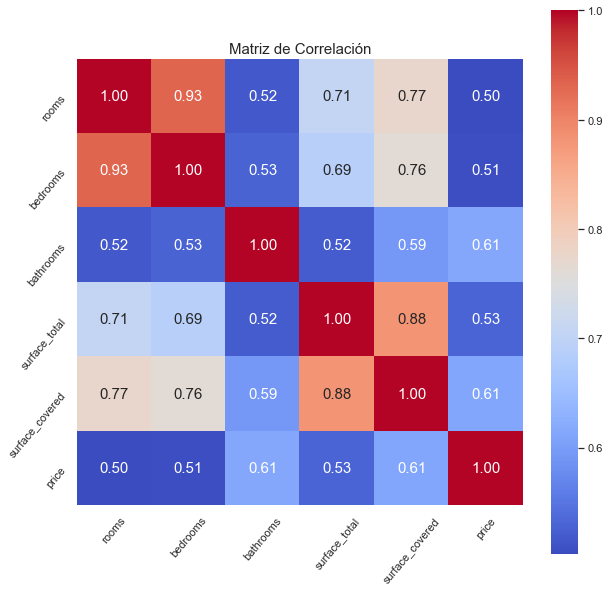

In [127]:
corr = data_clean.corr(method='pearson', min_periods=1) #saco la correlación para graficar
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm') #paleta de  colores
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.title('Matriz de Correlación', size = 15)
plt.show()

Ahora, sin tener valores negativos, podemos destacar que **entre el precio y la superficie cubierta hay una alta relación de 0.61, así tambien con la total con 0.53**, es decir, el tamaño de la propiedad en venta determina en mayor medida el precio. 

Podemos diferenciar por los tres tipos de propiedades que hemos filtrado anteriormente en este grafico de correlación. Para más detalles graficaremos la matriz para cáda tipo de propiedad y así poder estudiar la relación con el precio del inmueble en venta:

In [128]:
#Dividimos la variable categórica 

dptos = data_clean[data_clean.property_type == 'Departamento']
casas = data_clean[data_clean.property_type == 'Casa']
ph = data_clean[data_clean.property_type == 'PH']

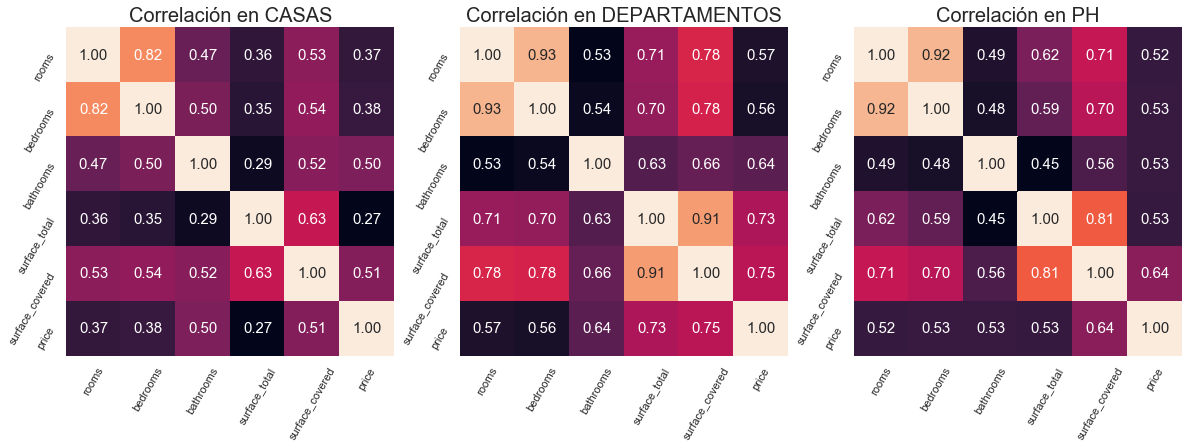

In [129]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
corr_casas = casas.corr(method='pearson', min_periods=1)
sns.heatmap(corr_casas, cbar = False,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en CASAS', size = 20)

plt.subplot(1,3,2)
corr_dptos = dptos.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_dptos, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en DEPARTAMENTOS', size = 20)

plt.subplot(1,3,3)
corr_ph = ph.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_ph, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15})
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en PH', size = 20)


plt.show()

Con estas tres matrices podemos destacar algunas diferencia en la influencia del precio de una propiedad:

En todas la influencia principal es con el atributo `surface_covered` sobre todo en Departamentos con un 0.75 (al igual que la total, sobre todo si cuenta con balcón).

Las Casas por su parte marca la diferencia mostrando una correlación más homogenea entre las variables que manejamos.

Ahora bien, siguendo contenido del bloque 2, normalizaré y escalaré los datos para poder notar la diferencia en estos valores y preparar los datos para luego trabajarlos en ML

### Normalización de datos (One-Hot Encoding)

Transformaremos los valores categoricos (que tanto influyen a las categorias) con <code>get_dummies</code>.

Aqui remarco que al trabajar con <code>l2</code>, las zonas de Gran Buenos Aires, con quien no habiamos trabajado en el P1, nuestro dataset realmente se ampliará mucho, una desventaja del 'One-Hoy Encoding'.

In [130]:
#One-Hot Encoding
dummies_l3 = pd.get_dummies(data_clean['l3'])
dummies_l2 = pd.get_dummies(data_clean['l2'])
dummies_property_type = pd.get_dummies(data_clean['property_type'])
df_clean = pd.concat([data_clean, dummies_l3, dummies_l2, dummies_property_type], axis=1)
df_clean = df_clean.drop(['l3','l2','property_type','title','description'], axis=1)
df_clean

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Abasto,Agronomía,Almagro,Almirante Brown,...,Villa Soldati,Villa Urquiza,Villa del Parque,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,Casa,Departamento,PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2.0,1.0,1.0,50.0,35.0,40000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2.0,1.0,1.0,54.0,48.0,165000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
146656,4.0,3.0,2.0,164.0,90.0,130000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
146657,1.0,1.0,1.0,50.0,35.0,73000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
146658,2.0,1.0,1.0,38.0,38.0,68000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Escalado de datos

Es necesario escalar los datos ya que las variables <code>bathrooms</code>, <code>bedrooms</code> y <code>rooms</code> tienen las mismas unidades, valores enteros chicos, mientras que las variables <code>surface_total</code> y <code>surface_covered</code> estan dadas en  𝑚2. Por lo que es buena idea hacer una estandarizacion de los datos para que esta diferencia en unidades no afecte al modelo.

Cada variable tiene que ser analizada de forma independiente para decidir que tipo de escalado de datos utilizar. Veamos la distribucion de las variables para luego tomar las decisiones.

Primero escalaré las variables discretas:

In [131]:
#Escalado
from sklearn.preprocessing import StandardScaler
data_scaled = df_clean.copy()

columns_to_scale = ['rooms', 'bedrooms', 'bathrooms']
features = data_scaled[columns_to_scale]

scaler = StandardScaler().fit(features.values)
feature = scaler.transform(features.values)
data_scaled[columns_to_scale] = feature

Por otro lado entonces, escalo las variables de superficie:

In [132]:
scaler_df = data_scaled.copy()
columns_to_scale  = ['surface_total', 'surface_covered']

scaler = StandardScaler()
scaled = scaler.fit_transform(scaler_df[columns_to_scale])

columns_left = scaler_df.copy()
columns_left = columns_left.drop(columns = columns_to_scale)

resulted_values = pd.DataFrame(scaled, index=scaler_df.index, columns=scaler_df[columns_to_scale].columns)
frames = [resulted_values,columns_left]
data_scaled = pd.concat(frames,axis=1)

data_scaled.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,Abasto,Agronomía,Almagro,Almirante Brown,...,Villa Soldati,Villa Urquiza,Villa del Parque,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,Casa,Departamento,PH
0,1.173541,1.916712,3.883557,5.698480,0.934989,153000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.295539,-0.357965,-0.802971,-0.959391,0.934989,159000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.820211,-0.718585,-0.802971,-0.959391,-0.636788,125000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.019264,-0.579885,-0.802971,-0.959391,-0.636788,295000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.715277,-0.995985,-0.802971,-0.959391,-0.636788,40000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Y finalmente, 'Price' que, al ser nuestra variable a predecir necesitamos que no pierda su escala real de USD por lo tanto la escalaré aeste caso precio, reestaclarlo con su media y std (a proposito de RMSE):

In [133]:
price_values = data_scaled.price

mean_price = price_values.mean()
std_price = price_values.std()

data_scaled.price = (data_scaled.price - mean_price)/std_price

data_scaled.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,Abasto,Agronomía,Almagro,Almirante Brown,...,Villa Soldati,Villa Urquiza,Villa del Parque,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,Casa,Departamento,PH
0,1.173541,1.916712,3.883557,5.698480,0.934989,-0.306369,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.295539,-0.357965,-0.802971,-0.959391,0.934989,-0.242325,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.820211,-0.718585,-0.802971,-0.959391,-0.636788,-0.605239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.019264,-0.579885,-0.802971,-0.959391,-0.636788,1.209329,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.715277,-0.995985,-0.802971,-0.959391,-0.636788,-1.512522,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [134]:
data_scaled

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,Abasto,Agronomía,Almagro,Almirante Brown,...,Villa Soldati,Villa Urquiza,Villa del Parque,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,Casa,Departamento,PH
0,1.173541,1.916712,3.883557,5.698480,0.934989,-0.306369,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.295539,-0.357965,-0.802971,-0.959391,0.934989,-0.242325,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.820211,-0.718585,-0.802971,-0.959391,-0.636788,-0.605239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.019264,-0.579885,-0.802971,-0.959391,-0.636788,1.209329,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.715277,-0.995985,-0.802971,-0.959391,-0.636788,-1.512522,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-0.631329,-0.635365,-0.802971,-0.959391,-0.636788,-0.178282,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
146656,1.677226,0.529714,1.071640,1.259900,0.934989,-0.551869,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
146657,-0.715277,-0.995985,-1.740276,-0.959391,-0.636788,-1.160283,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
146658,-0.967119,-0.912765,-0.802971,-0.959391,-0.636788,-1.213652,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Concluyo este preprocesamiento con un data set de 104.263 instancias y 102 features.

### SVD/PCA - Generación de nuevas variabes predictoras/reducción de dimensionalidad

La idea  de PCA es reducir o proyectar nuestra información a un espacio de dimensión menor, pero también puede servir para construir un indicador. Este será el ejemplo central de esta entrada.

Una observación fundamental es que  PCA es efectivo cuando la correlación entre variables es alta, es decir; la linealidad entre nuestras variables no es cero. Nuestro dataset es compatible con esta situación, por la cual aplicaremos:

In [135]:
from sklearn.decomposition import PCA

In [136]:
X2 = data_scaled.drop(["price"], axis=1)
y = data_scaled.price

In [137]:
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X2)

X_pca

array([[ 6.19121154e+00, -1.56387041e+00, -3.14025453e+00, ...,
        -2.74289522e-03,  1.68160436e-03,  4.49338429e-05],
       [-7.08111713e-01,  1.05409713e+00,  4.06557581e-01, ...,
        -4.01919056e-03, -5.64578531e-03,  1.14279896e-03],
       [-1.68580774e+00, -2.52017571e-01,  9.39857494e-02, ...,
         1.46767816e-03, -4.04172577e-03, -2.63633034e-04],
       ...,
       [-2.27495739e+00,  3.06269328e-01,  9.13251082e-01, ...,
         1.23078407e-03, -7.94833424e-04, -6.66641681e-03],
       [-1.91230420e+00,  1.02519292e-01,  4.40196367e-01, ...,
        -5.79286308e-04,  3.40354504e-04, -6.15202429e-03],
       [-1.22751496e-01, -5.18257768e-01,  2.93476261e-01, ...,
        -4.46957565e-04,  1.15761335e-03, -5.60294838e-03]])

### ML de P1

*Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. Sea cual sea la respuesta, intenta explicar a qué se debe.*

Rescato el modelo entrenado en P1 pero con el dataset de este proyecto para comparar rendimiento.

Rendimiento Último y mejor modelo de P1 - Arbol de Decisión1 (con variables dummies agregadas en <code>property_type</code>):

* max_depth = 40

**RMSE ÁRBOL 1**

* Raíz del error cuadrático medio en Train: 11872.203288533003
* Raíz del error cuadrático medio en Test: 34548.46547867345 

Realizaré el mismo procedimiento pero con éste nuevo dataset df_clean.
El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

In [138]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor

X = df_clean.drop(['price'], axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=50)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72984, 83) (72984,) (31279, 83) (31279,)


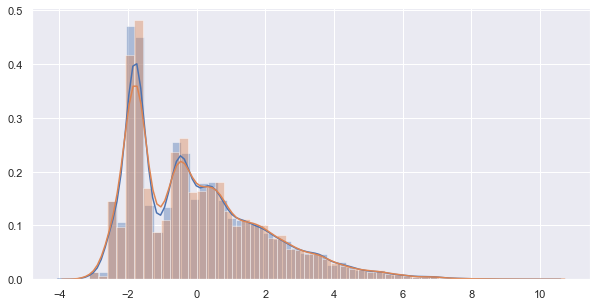

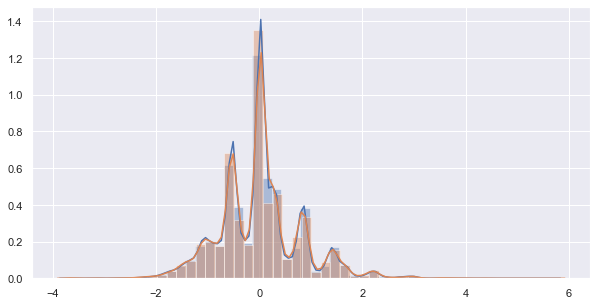

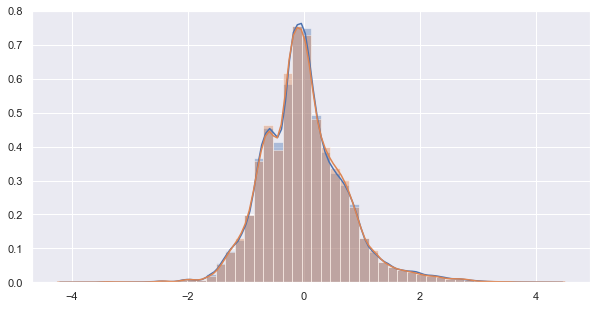

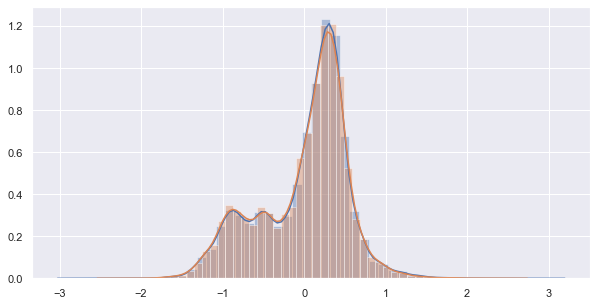

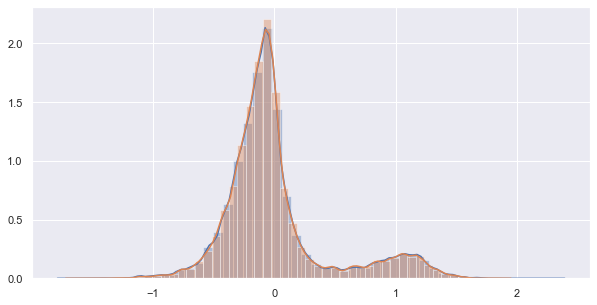

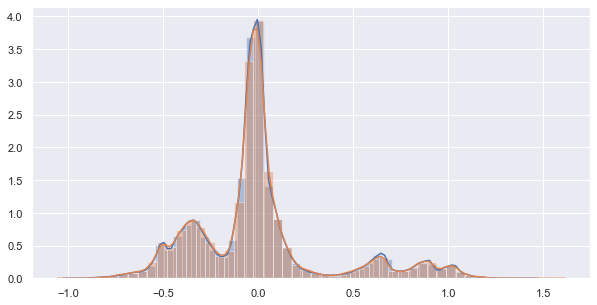

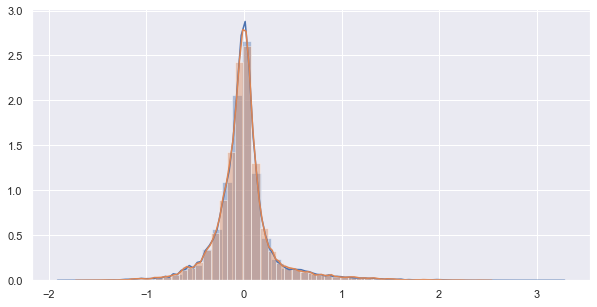

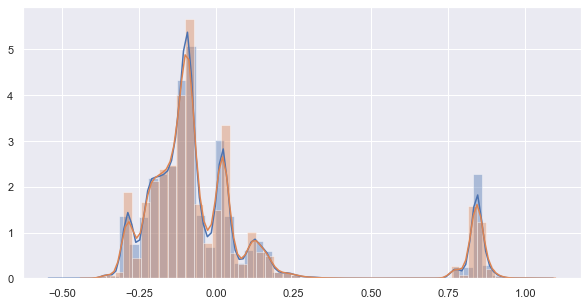

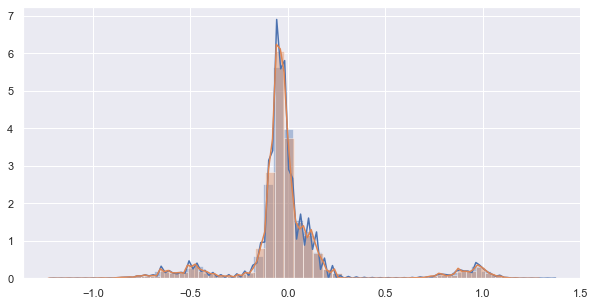

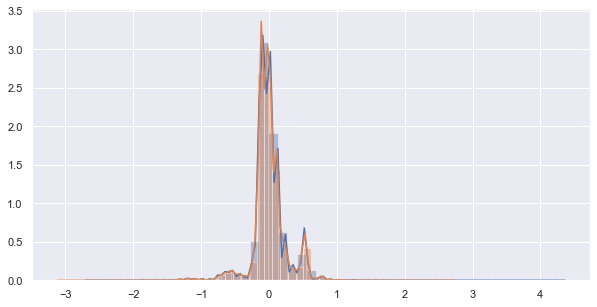

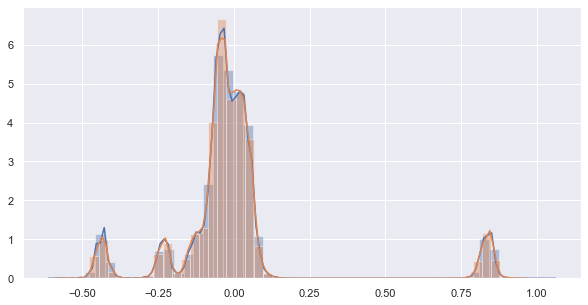

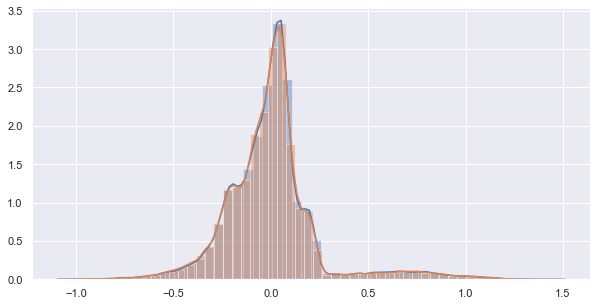

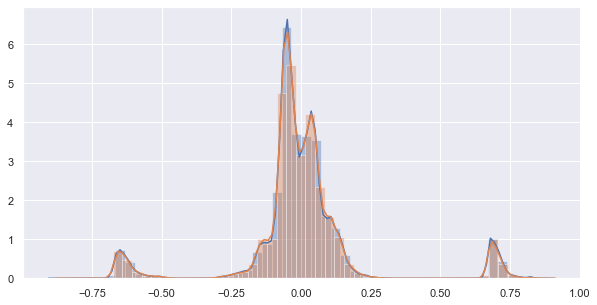

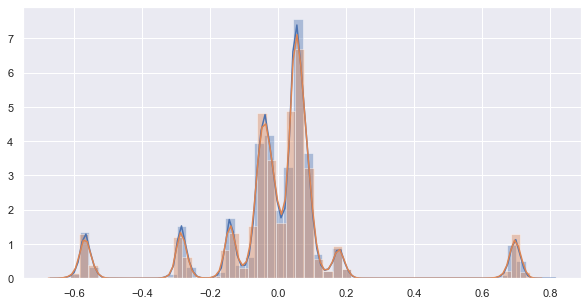

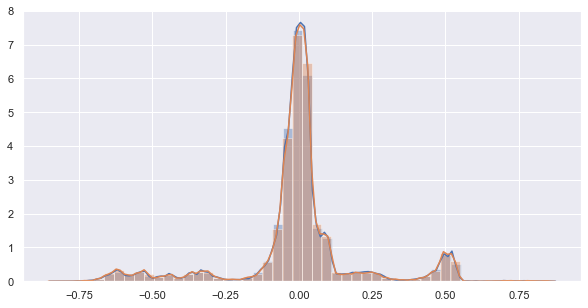

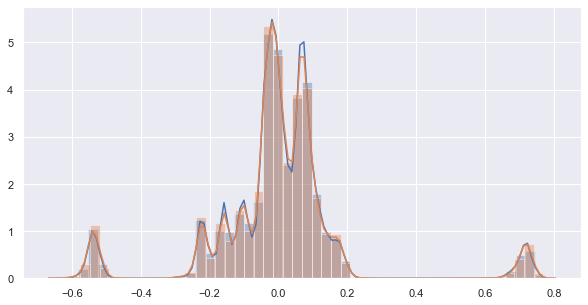

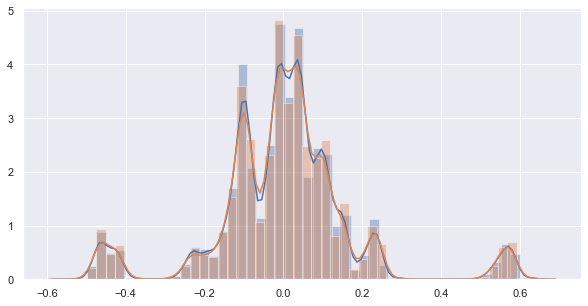

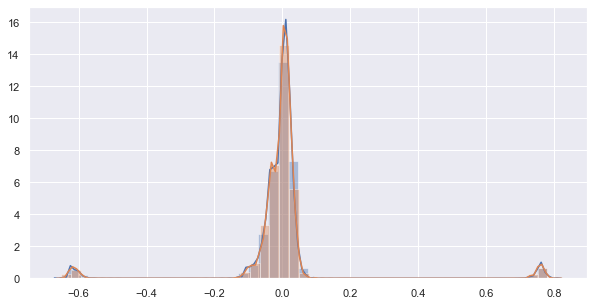

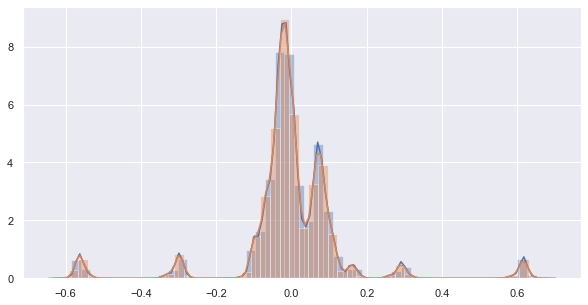

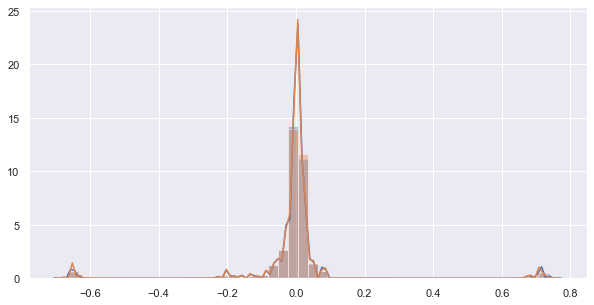

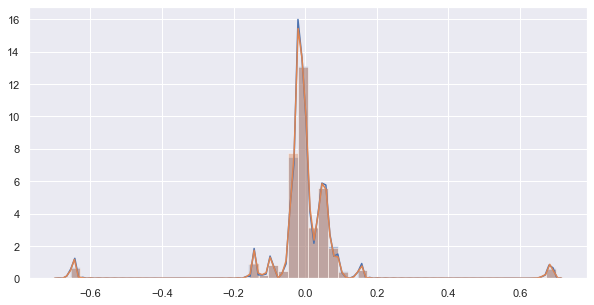

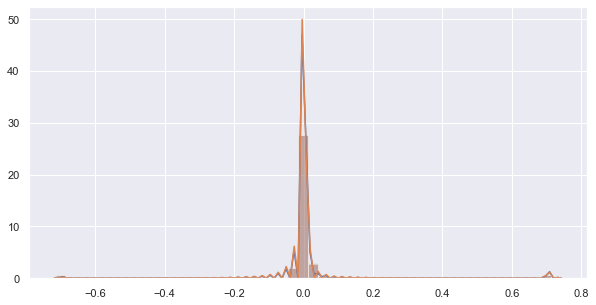

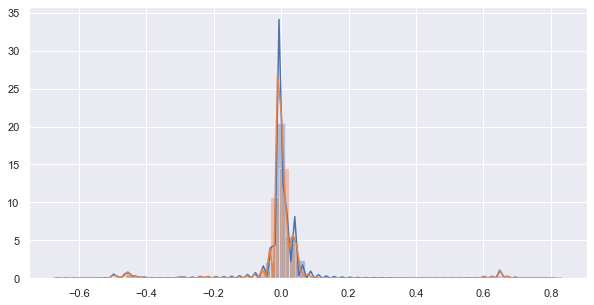

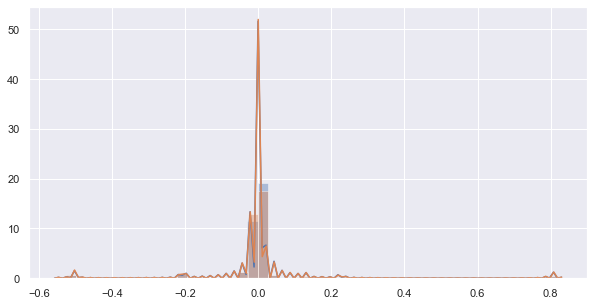

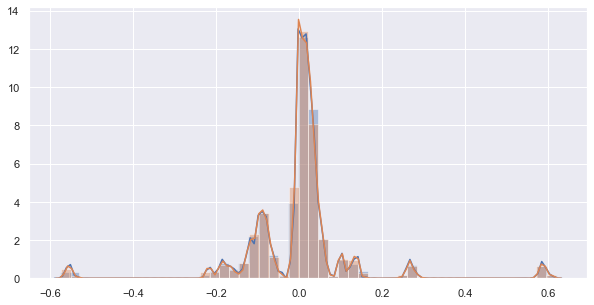

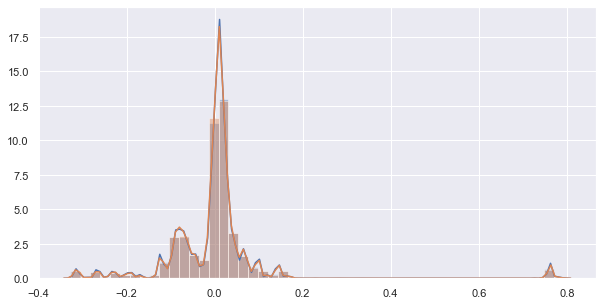

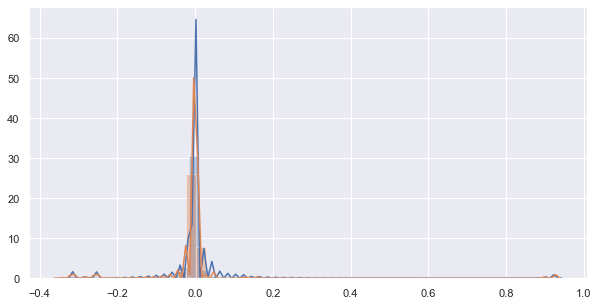

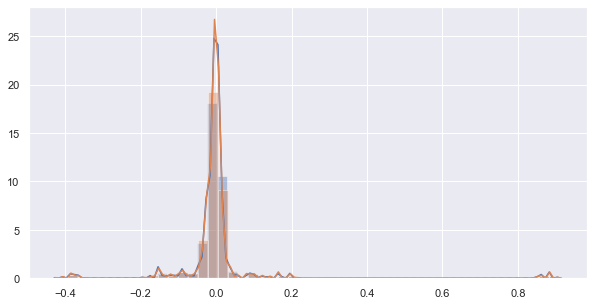

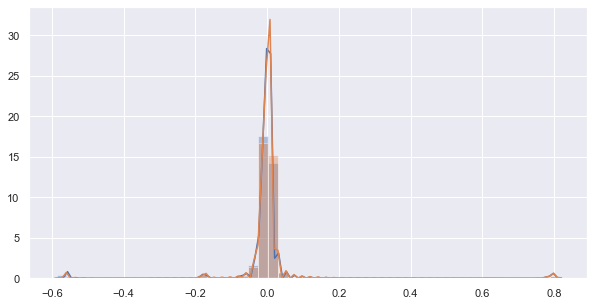

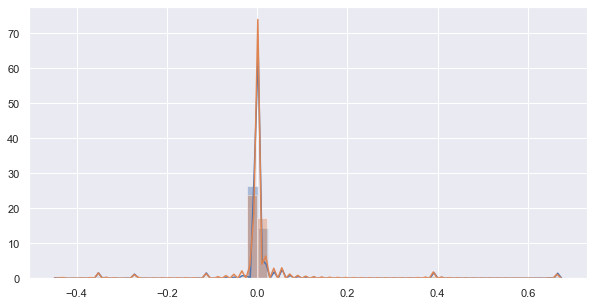

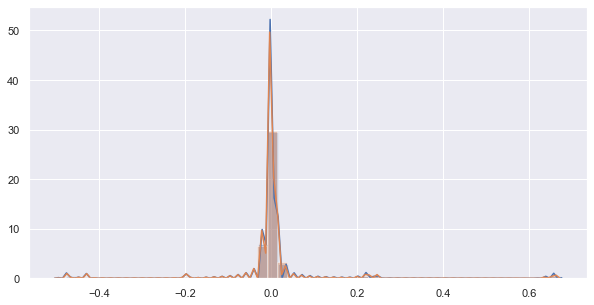

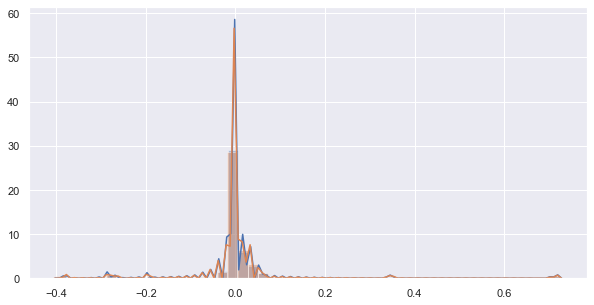

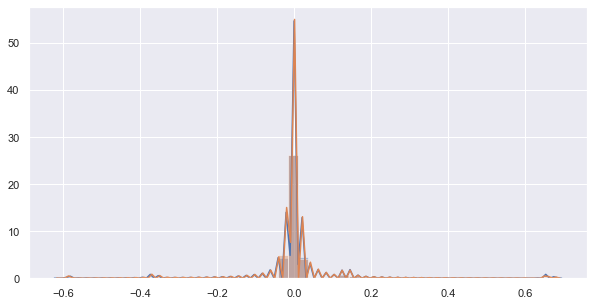

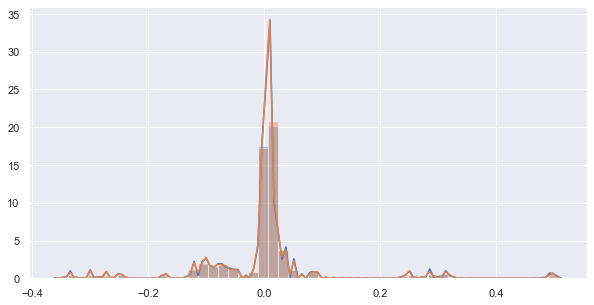

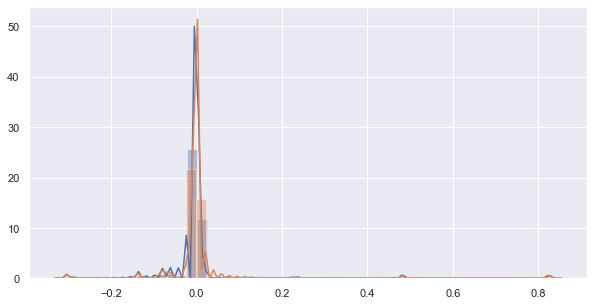

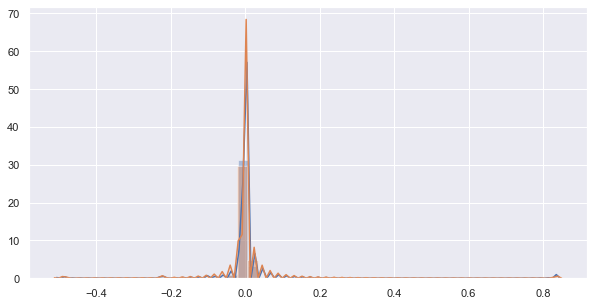

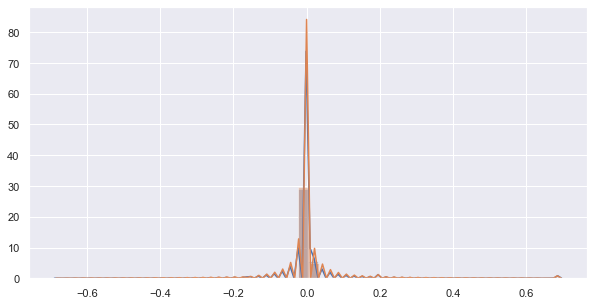

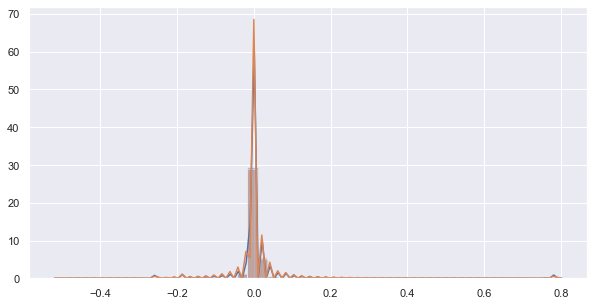

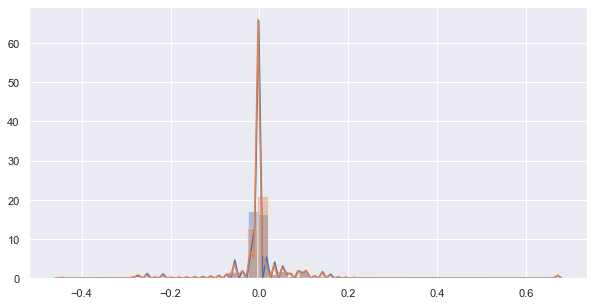

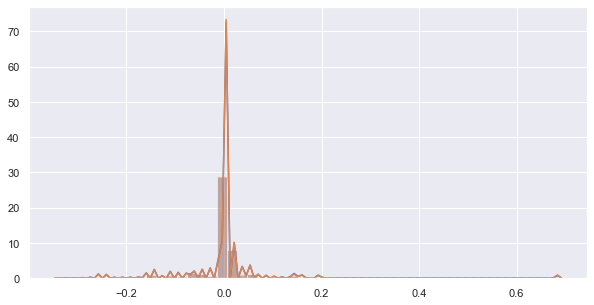

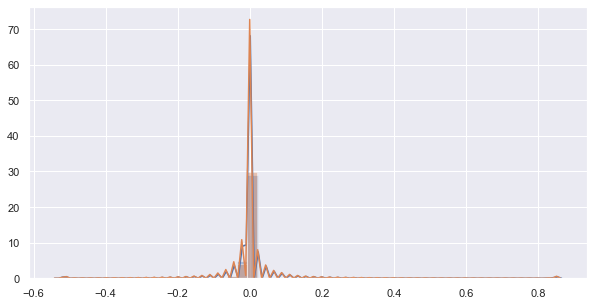

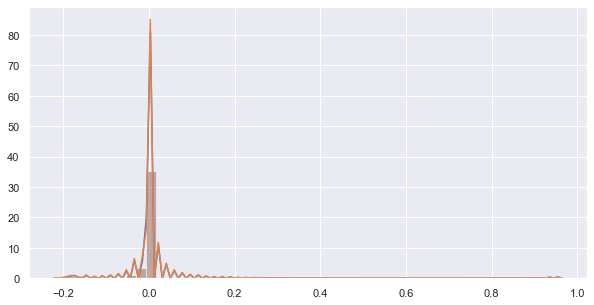

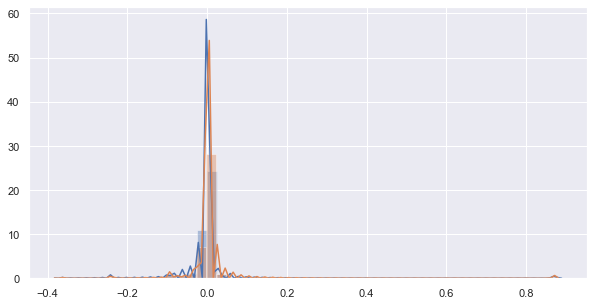

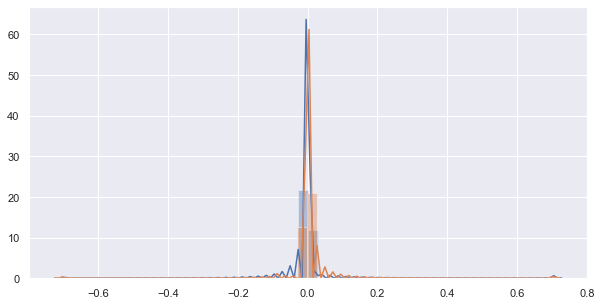

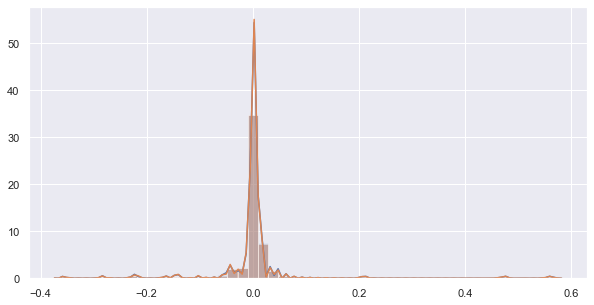

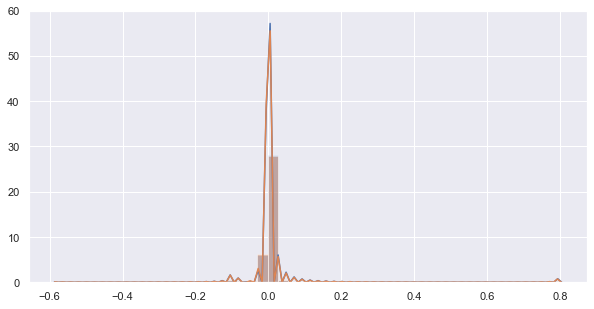

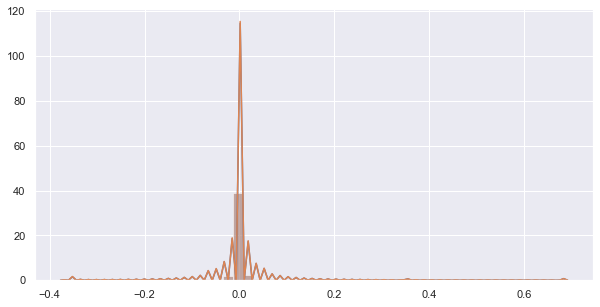

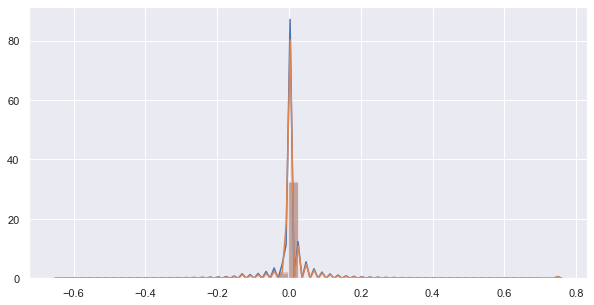

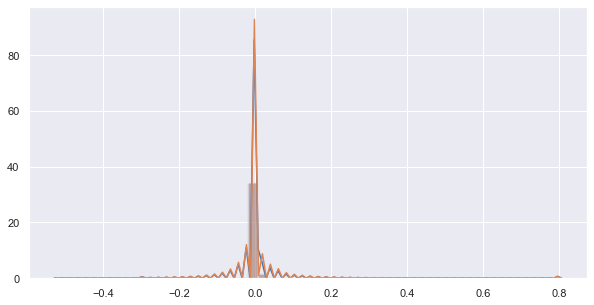

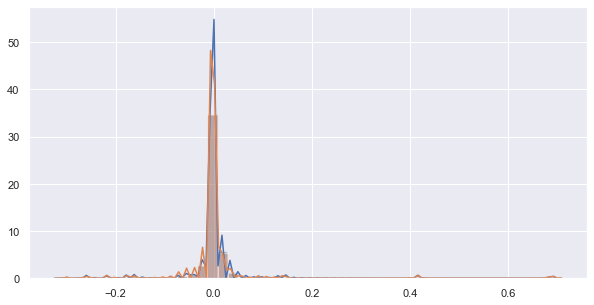

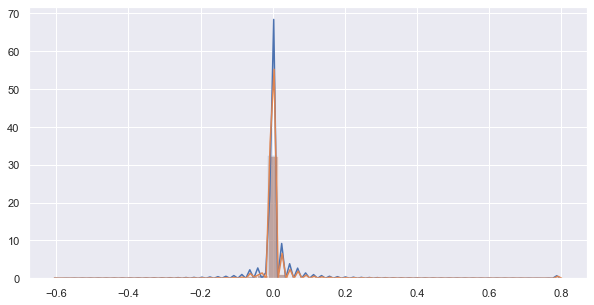

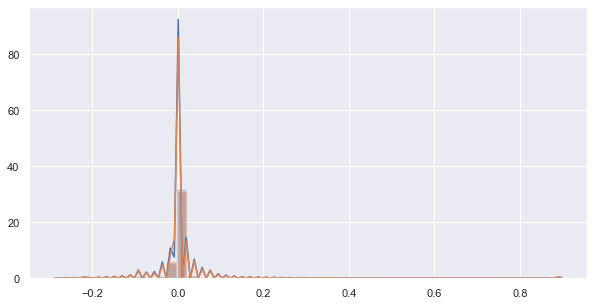

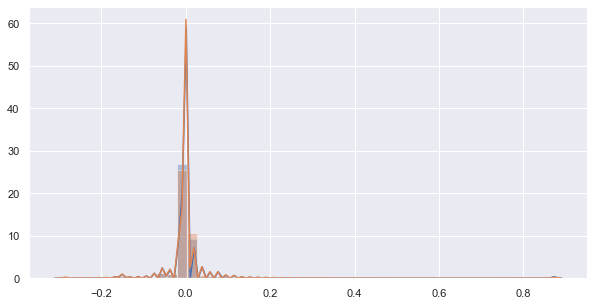

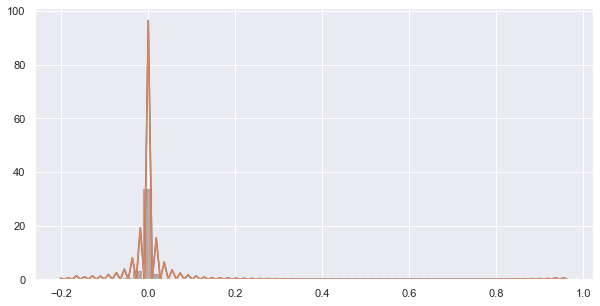

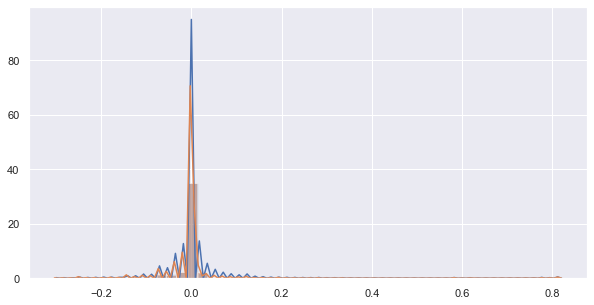

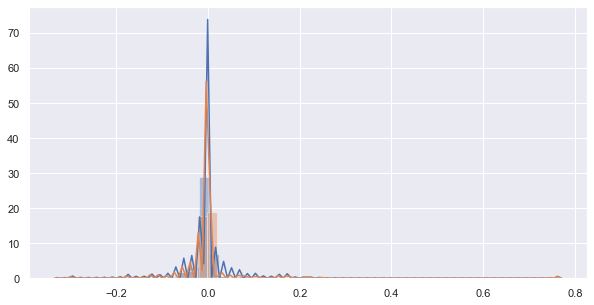

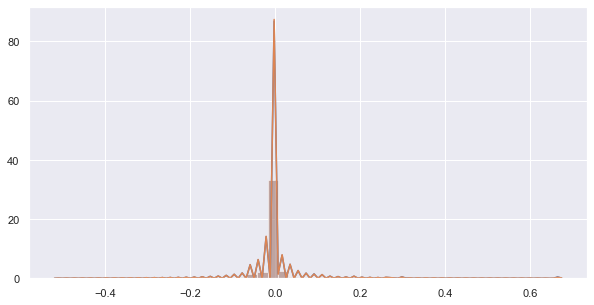

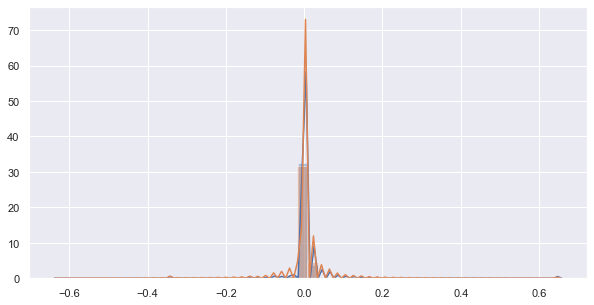

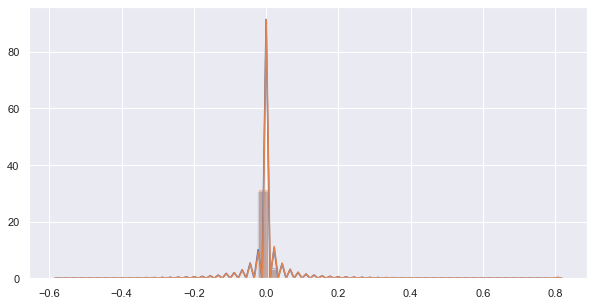

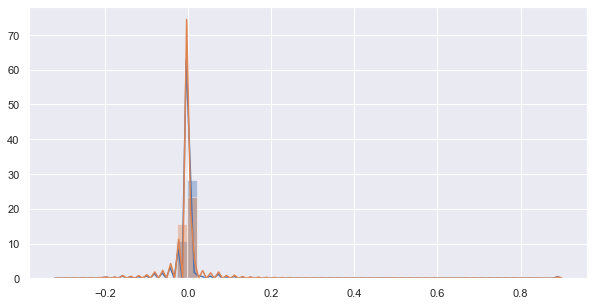

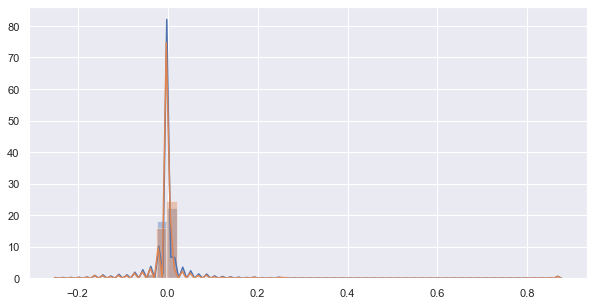

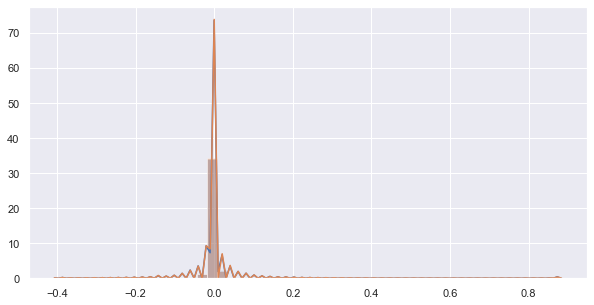

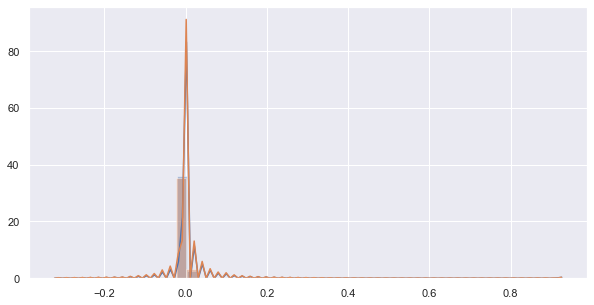

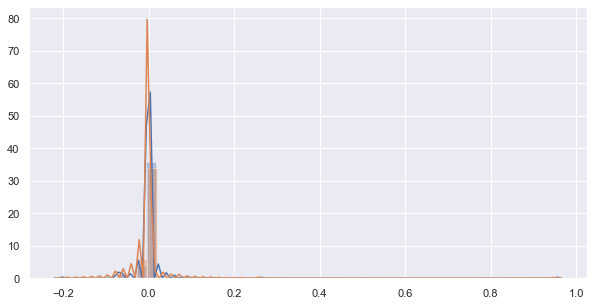

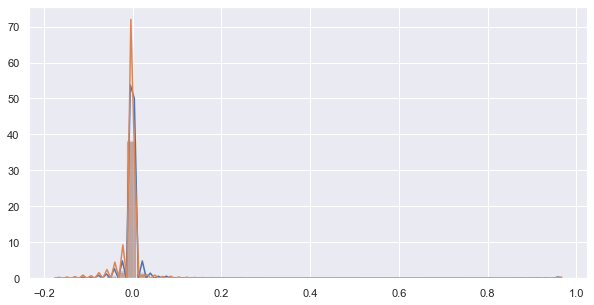

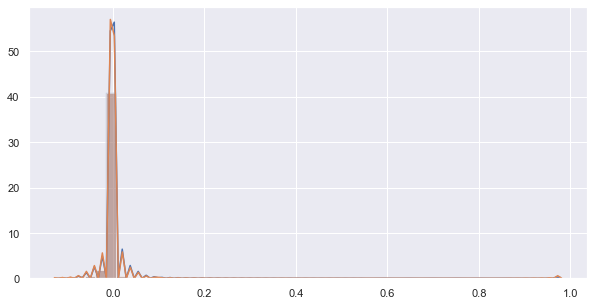

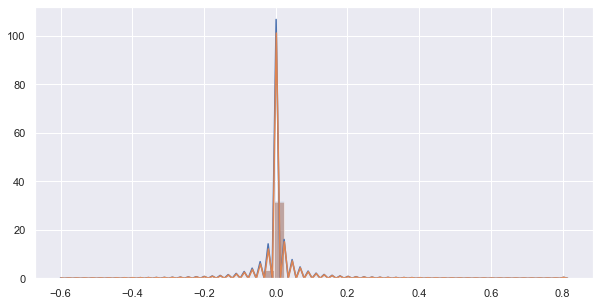

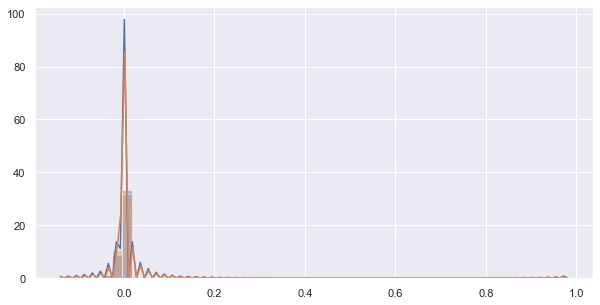

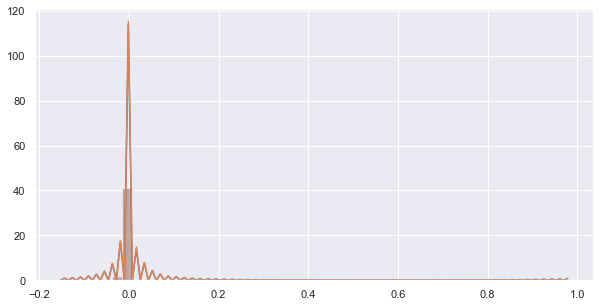

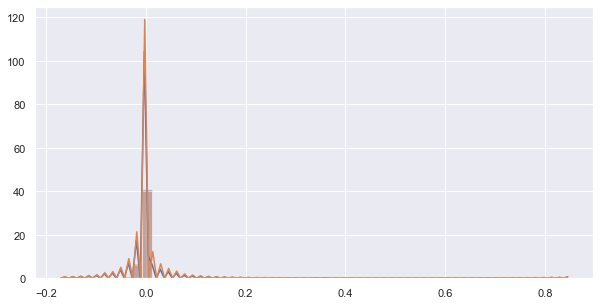

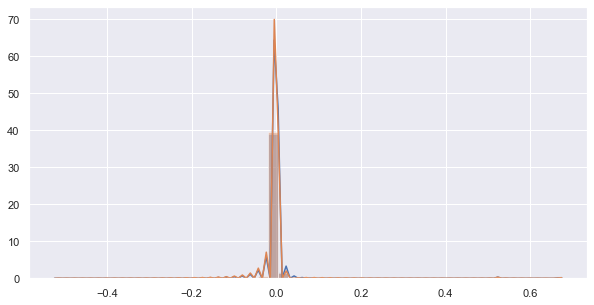

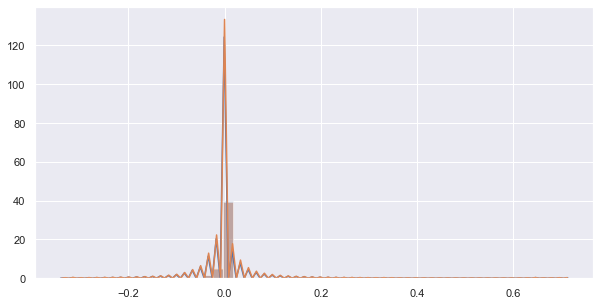

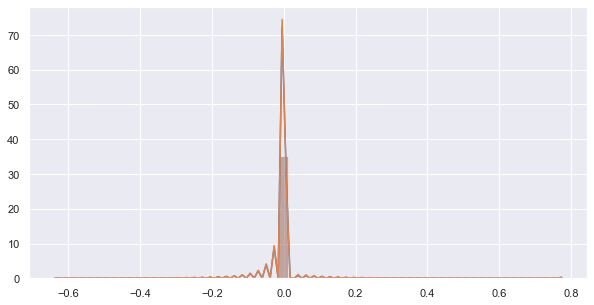

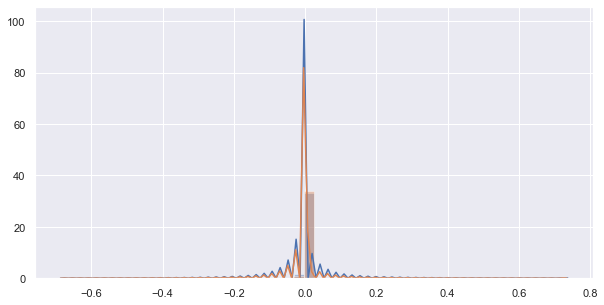

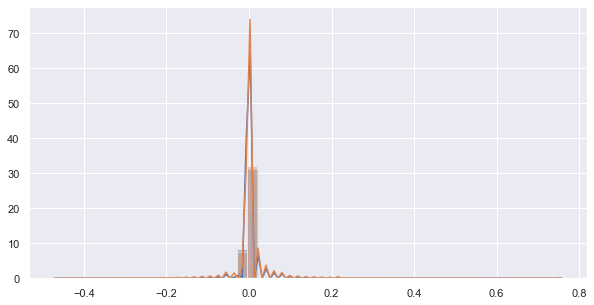

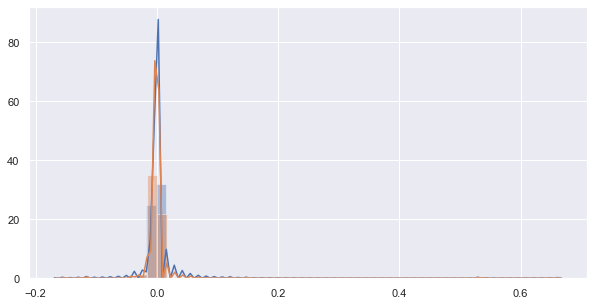

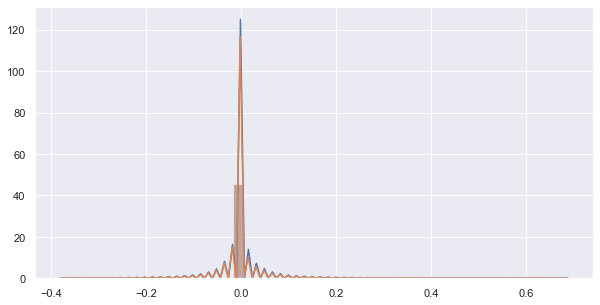

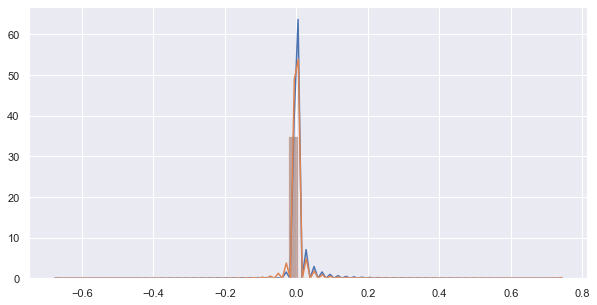

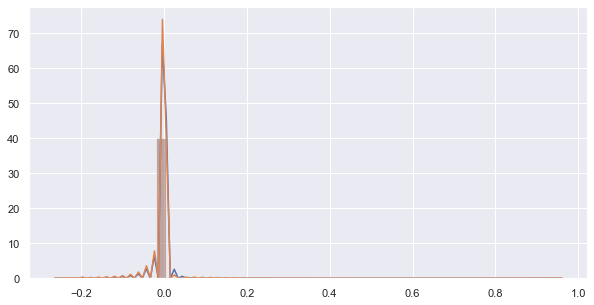

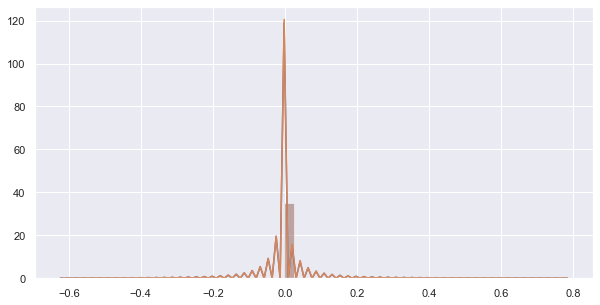

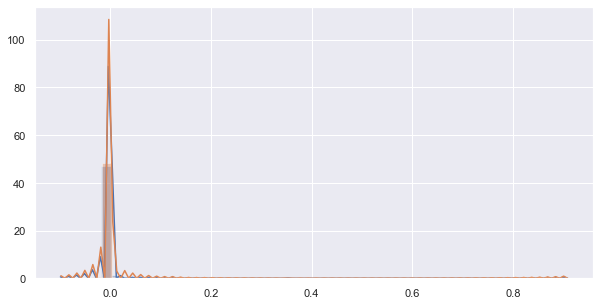

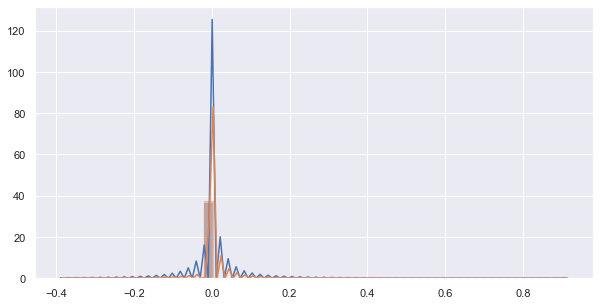

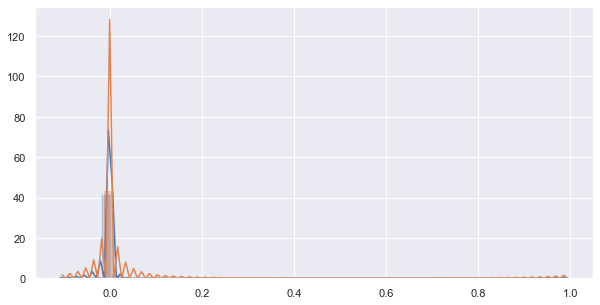

In [139]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

In [140]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  181609.1480050422
Proporcion de etiquetas positiva en los datos de Test:  181920.46772595032


Ahora, al igual que en Proyecto 1 buscamos el mejor parametro y entrenamos modelo con menos error.

In [141]:
lista_rmse_train_tree = []
lista_rmse_test_tree = []
rmse_train = 0
rmse_test = 0
max_depths = [1,5,6,7,8,9,10,10.5,11,12,13,14,15,16,17,18,19,20,21,22,24,25,30,40,45,50,55]

for i in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(X_train,y_train)
    
    y_train_pred_tree = tree_reg.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

    y_test_pred_tree = tree_reg.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    
    lista_rmse_train_tree.append(rmse_train)
    lista_rmse_test_tree.append(rmse_test)

El mínimo de RMSE en test es  42674.53883443444  en  20  profundidad del árbol.


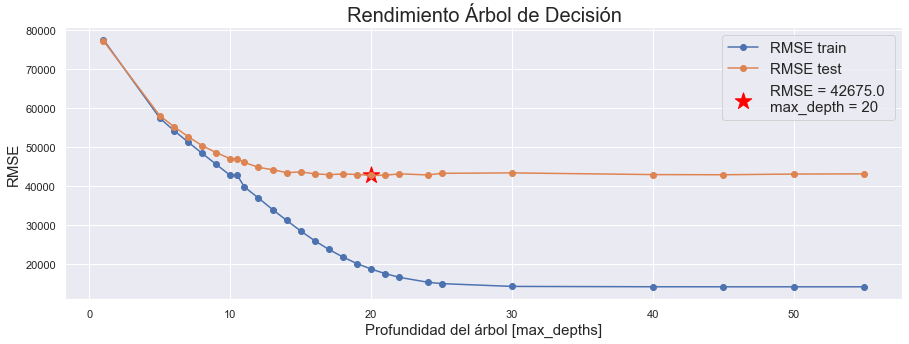

In [142]:
min_test_tree = np.amin(lista_rmse_test_tree)
lista_rmse_test_tree_op = lista_rmse_test_tree.index(min(lista_rmse_test_tree))
max_depths_op = max_depths[lista_rmse_test_tree_op]
print('El mínimo de RMSE en test es ', min_test_tree, ' en ', max_depths_op, ' profundidad del árbol.')

plt.figure(figsize=(15,5))

plt.plot(max_depths, lista_rmse_train_tree, 'o-', label = 'RMSE train')
plt.plot(max_depths, lista_rmse_test_tree, 'o-', label = 'RMSE test')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento Árbol de Decisión', size = 20)
plt.scatter(max_depths_op, min_test_tree, s=300, marker = '*', 
         label = 'RMSE = {} \nmax_depth = {} '.format(round(min_test_tree),max_depths_op), color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('Arbol1.png')

plt.show()

In [143]:
tree_regressor = DecisionTreeRegressor(max_depth = 40)
tree_regressor.fit(X_train, y_train)
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_tree}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_tree}')
#Bechmarck para parte B

La raíz del error cuadrático medio en TRAIN es de $14072.311561107193
La raíz del error cuadrático medio en TEST es de $42868.99537473794


In [144]:
dism_train =(((rmse_train_tree-11872.20)/11872.20)*100) #formula de crecimiento
dism_test = (((rmse_test_tree-34548.46)/34548.46)*100)
print('Diferencia del RMSE entre P1 y P2 de train en un %', dism_train)
print('Diferencia del RMSE entre P1 y P2 de test en un %', dism_test)

Diferencia del RMSE entre P1 y P2 de train en un % 18.53162481349028
Diferencia del RMSE entre P1 y P2 de test en un % 24.08366501643761


Aqui veo entonces un crecimiento de los errores respectivamente de cada muestra recordando los resultados de Proyecto 1. Un 18% más de errores entrain y un 24% más en test. Su profundidad  tambien optima se mantuvo en la muestra de mejor parametro manueal, en 40.
Entonces, **el rango de error es mucho mayor**, estimo tambien porque una de las principales diferencias entre ambos datasets, a pesar de el procesamiento en si, es que la muestra es mucho mayor y en este proyecto agregamos un 40% más de datos sumando las tres zonas de Gran Buenos Aires.

Por otro lado, puedo entender que tenemos más variables numericas que afectan a precio, en la correlación se ve "más unificada" la influencia entre las variables, todas importantes en ese caso y luego variables categóricas que se volvieron numericas, como los barrios y los tipos de viviendas dan a la homogeneización y complejidad del mismo.

## PARTE B - Modelos Avanzados 

* *Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.*
* *Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.*
* *Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.*



Modelos Avanzados para mejorar nuestros análisis y modelos de Machine Learning con el Preprocesamiento de Datos; me planteo un **objetivo personal: mejorar el rendimiento y disminuir RMSE de DecisionTreeRegressor** utilizando como parametro el modelo anterior, es decir mi **BENCHMARK DecisionTreeRegressor**

* La raíz del error cuadrático medio en TRAIN es de $ 14072.3

* La raíz del error cuadrático medio en TRAIN es de $ 42921.4

In [145]:
from sklearn.ensemble import BaggingRegressor
from xgboost.sklearn import XGBRegressor

import xgboost as xgb
import scipy as sp

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [146]:
#Decido explorar estos modelos

tree = DecisionTreeRegressor()
bagging = BaggingRegressor()
forest = RandomForestRegressor()
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=250)
linear_model = LinearRegression()

#### DecisionTreeRegressor optimizado con RandomSearchCV


In [147]:
param_tree = {"criterion": ["mse", "friedman_mse"],
             "max_depth": sp.stats.randint(2, 20),
             "min_samples_split": sp.stats.randint(2, 20)}

In [148]:
tree_opt = RandomizedSearchCV(tree, param_tree, 
                              n_iter = 100, 
                              random_state = 42, 
                              cv = 5, n_jobs = -1)

tree_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [149]:
print('DecisionTreeRegressor optimizado con RandomSearchCV')

y_train_predCV = tree_opt.predict(X_train)
y_test_predCV = tree_opt.predict(X_test)

rmse_train_treeRSCV = np.sqrt(mean_squared_error(y_train, y_train_predCV))
rmse_test_treeRDCV = np.sqrt(mean_squared_error(y_test, y_test_predCV))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_treeRSCV}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_treeRDCV}')

DecisionTreeRegressor optimizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $26555.79086086097
La raíz del error cuadrático medio en TEST es de $42306.190720662766


Aumenta muy poco el error en este caso con la optimización.

#### BaggingRegressor con DecisionTreeRegressor

In [150]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        bootstrap = True,
                        bootstrap_features= False,
                        n_estimators = 500,
                        n_jobs = -1)


In [151]:
#bagging.fit(X_train, y_train) 

No puedo terminar de probar este modelo porque tengo un problema en mi computadora, al parecer necesito más RAM :( 

Pero seguiré probando con los siguientes y lo dejo aquí para ser probado en otro momento con otra PC si es posible...

*Error: OSError: [WinError 1450] Recursos insuficientes en el sistema para completar el servicio solicitado*


In [152]:
#print('BaggingRegressor con DecisionTreeRegressor')

#y_train_predBG = bagging.predict(X_train)
#y_test_predBG = bagging.predict(X_test)

#rmse_train_treeBG = np.sqrt(mean_squared_error(y_train, y_train_predCV))
#rmse_test_treeBG = np.sqrt(mean_squared_error(y_test, y_test_predBG))
#print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_treeBG}')
#print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_test_treeBG}')

### RandomForest

In [153]:
forest = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)


In [154]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [155]:
print('RandomForest')

y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_forest}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_forest}') #el mejor!

RandomForest
La raíz del error cuadrático medio en TRAIN es de $17673.89804679874
La raíz del error cuadrático medio en TEST es de $34510.31980437673


#### RandomForest optmizado con RandomSearch


In [156]:
random1 = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf_random = RandomizedSearchCV(RandomForestRegressor(), 
       param_distributions = random1, 
       n_iter = 10, 
       cv = 3, 
       n_jobs = -1)

In [157]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [158]:
print('RandomForest optmizado con RandomSearchCV')

y_train_forestCV = rf_random.predict(X_train)
y_test_forestCV = rf_random.predict(X_test)

rmse_train_forestCV = np.sqrt(mean_squared_error(y_train, y_train_forestCV))
rmse_test_forestCV = np.sqrt(mean_squared_error(y_test, y_test_forestCV))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_forestCV}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_forestCV}') #le tenia fe a este pero no...

RandomForest optmizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $18757.689099240528
La raíz del error cuadrático medio en TEST es de $34662.63450376452


#### Polinomial Regression

In [159]:
linear = LinearRegression()

In [160]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
print('Regresión polinómica')

y_train_pred_linear = linear.predict(X_train)
y_test_pred_linear = linear.predict(X_test)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_linear}')
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_test_linear}') #el peor

Regresión polinómica
La raíz del error cuadrático medio en TRAIN es de $50069.84402248753
La raíz del error cuadrático medio en TRAIN es de $50126.482338350674


#### AdaBoost optimizado con RandomSearchCV

In [162]:
param_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [163]:
adaboost = RandomizedSearchCV(AdaBoostRegressor(),
                              param_distributions = param_ada,
                              cv=3,
                              n_iter = 10,
                              n_jobs=-1)

In [164]:
adaboost.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [165]:
print('AdaBoost optmizado con RandomSearchCV')

y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

rmse_train_adaboost = np.sqrt(mean_squared_error(y_train, y_train_pred_adaboost))
rmse_test_adaboost = np.sqrt(mean_squared_error(y_test, y_test_pred_adaboost))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_adaboost}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_adaboost}')

AdaBoost optmizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $59332.25916293214
La raíz del error cuadrático medio en TEST es de $59628.18197016163


#### XGBRegressor

In [166]:
xg_model = XGBRegressor(objective="reg:squarederror")

In [167]:
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [168]:
print('XGBRegressor')

y_train_pred_xgbr = adaboost.predict(X_train)
y_test_pred_xgbr = adaboost.predict(X_test)

rmse_train_xgbr = np.sqrt(mean_squared_error(y_train, y_train_pred_xgbr))
rmse_test_xgbr = np.sqrt(mean_squared_error(y_test, y_test_pred_xgbr))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_xgbr}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_xgbr}')

XGBRegressor
La raíz del error cuadrático medio en TRAIN es de $59332.25916293214
La raíz del error cuadrático medio en TEST es de $59628.18197016163


#### XGBoost + RandomSearchCV

In [169]:
parameters = {
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }

In [170]:
xg_model_opt = XGBRegressor(objective ='reg:squarederror')

xg_model_opt = RandomizedSearchCV(xg_model_opt, parameters, cv=5)

xg_model_opt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [171]:
print('XGBRegressor con RandomSearchCV')

y_train_pred_xgbr2 = adaboost.predict(X_train)
y_test_pred_xgbr2 = adaboost.predict(X_test)

rmse_train_xgbr2 = np.sqrt(mean_squared_error(y_train, y_train_pred_xgbr2))
rmse_test_xgbr2 = np.sqrt(mean_squared_error(y_test, y_test_pred_xgbr2))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_xgbr2}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_xgbr2}')

XGBRegressor con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $59332.25916293214
La raíz del error cuadrático medio en TEST es de $59628.18197016163


### Resultados 

In [182]:
print('DecisionTreeRegressor optimizado manualmente')

print(f'RMSE en TRAIN es de ${rmse_train_tree}')
print(f'RMSE en TEST es de ${rmse_test_tree}')
print('-')
print('DecisionTreeRegressor con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_treeRSCV}')
print(f'RMSE en TEST es de ${rmse_test_treeRDCV}')
print('-------------------------------------')

print('RandomForest')

print(f'RMSE en TRAIN es de ${rmse_train_forest}')
print(f'RMSE en TEST es de ${rmse_test_forest}')
print('-')
print('RandomForest optmizado con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_forestCV}')
print(f'RMSE en TEST es de ${rmse_test_forestCV}')
print('-------------------------------------')


print('Regresión polinómica')

print(f'RMSE en TRAIN es de ${rmse_train_linear}')
print(f'RMSE en TEST es de ${rmse_test_linear}') 
print('-------------------------------------')

print('AdaBoost optmizado con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_adaboost}')
print(f'RMSE en TEST es de ${rmse_test_adaboost}')
print('-------------------------------------')

print('XGBRegressor')

print(f'RMSE en TRAIN es de ${rmse_train_xgbr}')
print(f'RMSE en TEST es de ${rmse_test_xgbr}')
print('-')
print('XGBRegressor con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_xgbr2}')
print(f'RMSE en TEST es de ${rmse_test_xgbr2}')
print('-------------------------------------')


DecisionTreeRegressor optimizado manualmente
RMSE en TRAIN es de $14072.311561107193
RMSE en TEST es de $42868.99537473794
-
DecisionTreeRegressor con RandomSearchCV
RMSE en TRAIN es de $26555.79086086097
RMSE en TEST es de $42306.190720662766
-------------------------------------
RandomForest
RMSE en TRAIN es de $17673.89804679874
RMSE en TEST es de $34510.31980437673
-
RandomForest optmizado con RandomSearchCV
RMSE en TRAIN es de $18757.689099240528
RMSE en TEST es de $34662.63450376452
-------------------------------------
Regresión polinómica
RMSE en TRAIN es de $50069.84402248753
RMSE en TEST es de $50126.482338350674
-------------------------------------
AdaBoost optmizado con RandomSearchCV
RMSE en TRAIN es de $59332.25916293214
RMSE en TEST es de $59628.18197016163
-------------------------------------
XGBRegressor
RMSE en TRAIN es de $59332.25916293214
RMSE en TEST es de $59628.18197016163
-
XGBRegressor con RandomSearchCV
RMSE en TRAIN es de $59332.25916293214
RMSE en TEST es

Como iba evaluando anteriormente y ahora, viendo el resultado de los modelos avanzados elegidos, destaco que de igual forma, el modelo elegido en el proyecto1, Arbol de Decisión optimizado manualmente ha tenido mejor performance. Aunque con desepción noto que el error es mayor que en proyecto 1 salvando sus grandes diferencias que nos pueden dar a enterner estas variantes. Por un lado sumamos Gran Buenos Aires y que contamos con un dataset mucho más complejo con más variables numericas que afectan a precio, en la correlación se ve "más unificada" la influencia entre las variables, todas importantes en ese caso y luego variables categóricas que se volvieron numericas, como los barrios y los tipos de viviendas dan a la homogeneización y complejidad del mismo.

**Sigue siendo mejor modelo el DecisionTreeRegressor siguiendole RandomForest**

## PARTE C- Modelos Avanzados 

Con estos resultados entonces **sigo notando mejor performance en el modelo primero, DecisionTreeRegressor, sin embargo RandomForest muetra mejor performance en TEST aunque TRAIN sea más alto que el primer modelo** ya que no sólo sigue dando menos error sino que tambien parece ser el más simple con este dataset, tambien puedo suponer que a veces sucede que tal vez al tener tan procesado los datos anteriormente supone que no requiere un modelo tan avanzado, simplemente en este caso.
Sin embargo puedo entender que aplicando logaritmos y/o sistemas mucho más complejos u otros sistemas de presprocesamiento superiores podría rendir mucho mejor.

Por otor lado, por tratarse de modelos avanzados elijo en este caso **RandomForest**

Graficaré las variables con más influencia en la proyección en ambos modelos:

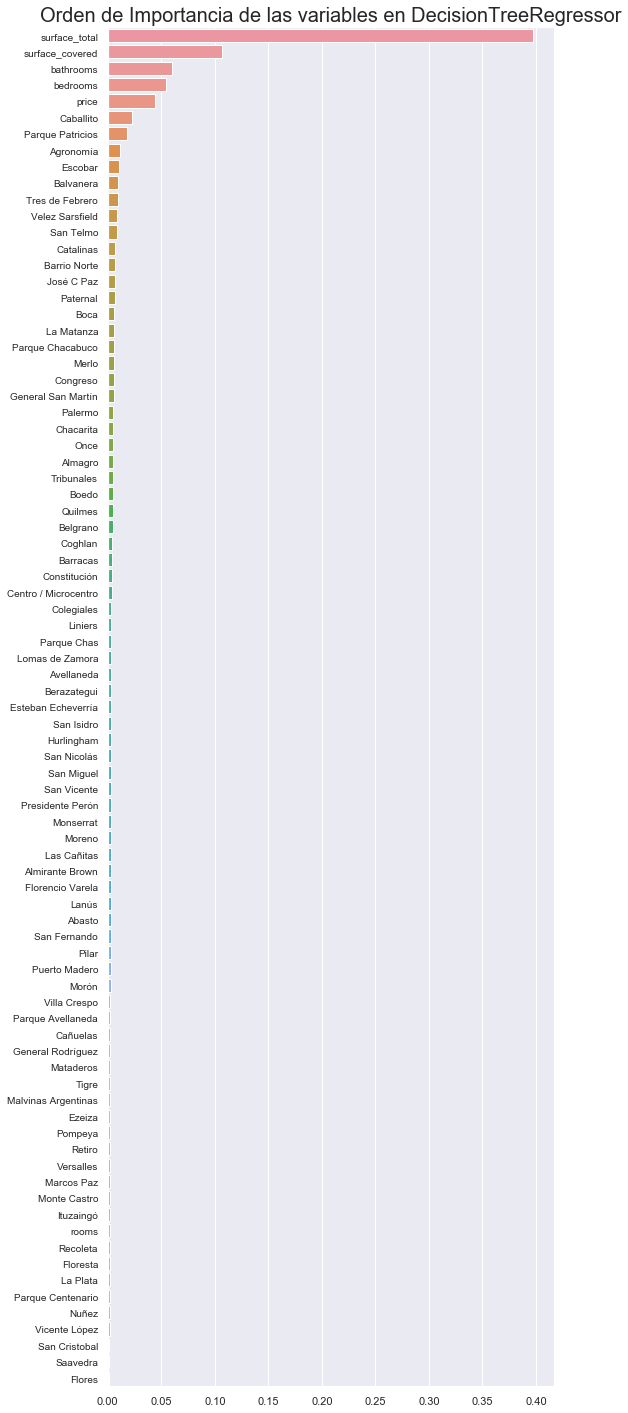

In [185]:
importances = tree_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
columns = data_scaled.columns

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en DecisionTreeRegressor", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

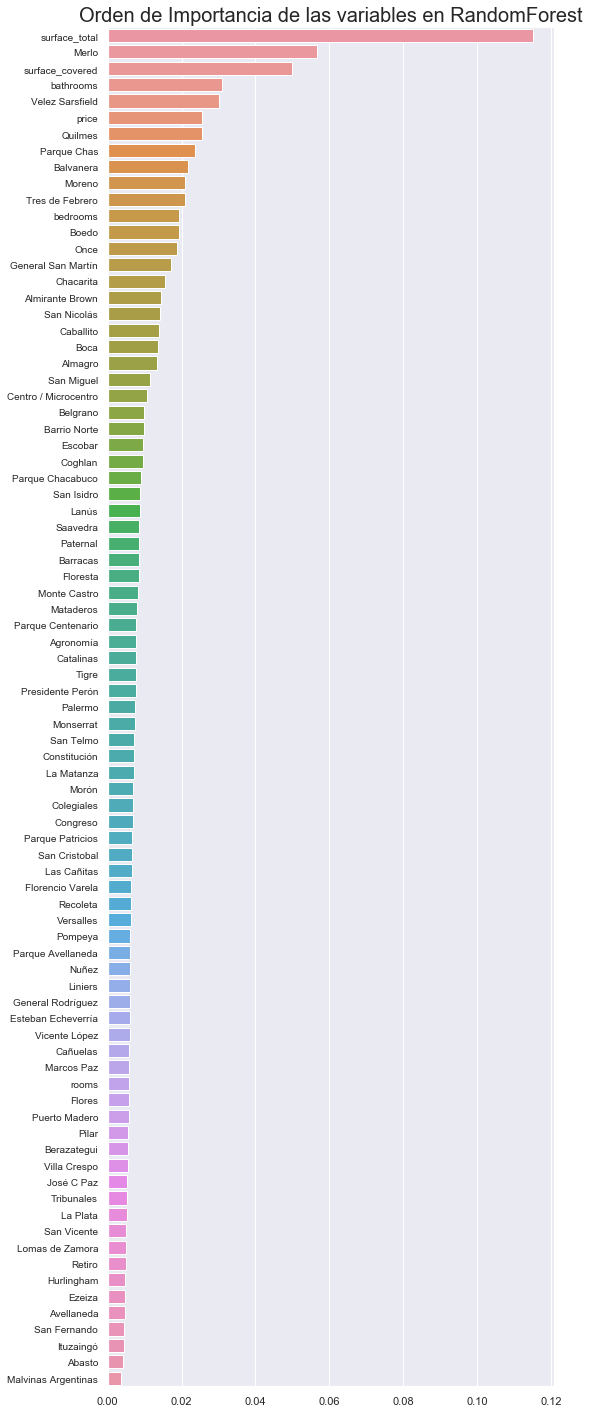

In [179]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
columns = data_scaled.columns

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en RandomForest", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

Observo que en linea de lo estudiado del dataset en el preprocesamiento de datos, la variable `surface_total`, luego sorprendentemente en el modelo avanzado **RandomForest** aparece *Merlo* como una variable importante proveniente de l2, los barrios de la ciudad, que al parecer condicionaron fuertemente. De la misma manera en Tree Regressor aparece el barrio de caballito en 5ta posición.

Más alla de esto, `surface_total` abarca más de un 60 porciento de correlación lo cual influye demasiado. Creo que si hubiera más variables que puedan condicionar tanto el resultado podría ser con mejor performance en el dataset, varibles como saber los servicios de las viviendas, accesibilidades, seguridad, antiguedad de construcción, etc... que estimo que influyen a su precio real.

Por otro lado, creo que el modelo podría haber sido mejor, o desempeñado mejor o me faltaron talvez más librerias especificas respecto a este tema, pero que por no querer mezclar tanto no implementé. El error en USD sigue siendo muy grande para predecir una variable tan sensible con el precio de algo y, creo que si estuviera trabajando en ello, recabaria un dataset nuevo referido a inmuebles en si y además haria varios, por tipo de vivienda, por zonas, y no mezclaría tanto como hice aquí